## FINAL PROJECT.

### Client: AtliQ Hardware.

### AtliQ Hardware is one of the leading computer hardware producers in India, and has even expanded into other countries as well. They sell different types of hardware to big players such as Amazon, Best Buy, and Walmart.<br>
### This year, they're asking PWC to conduct a big audit of their sales and help them automate their existing data.

***

### FINNANCIAL ANALYSIS

#### DECOMPOSITION AND RESEARCH TASKS:

### 1. Definition of Objectives and Key Questions

#### Objective: Understand how revenue, profits, and margins have changed over time. Analyze shifts in the market and identify the most profitable categories.<br>
#### Key Questions:<br>
- How have revenue and profits trended over the years?<br>
- What are the profit margins, and how have they evolved?<br>
- Which markets, platforms, or channels have driven the most revenue and profit?<br>
- What categories of products are the most profitable?<br>
- How have different regions/subzones contributed to revenue and profit?<br>
- Are there any noticeable shifts in market trends or customer preferences?

***

### 2. Identify the Important Metrics

#### Revenue Metrics:<br>
- Total Revenue: The total income generated from sales before any expenses are subtracted.
- Total Sales Volume: The total number of units sold.
#### Profit Metrics:
- Total Gross Profit: The total profit the company makes after subtracting the cost of goods sold (COGS) from revenue.
- Customer Lifetime Value: The total gross profit expected from a customer over the entire duration of their relationship with the company.
- Discounts Customer: The total discounts provided to each customer. Useful for evaluating the impact of discounts on profitability.
- Profit Margin:  To assess the profitability of the company as a whole, a specific product line, or a business unit. It gives a direct understanding of overall profitability.<br>
#### Market and Category Metrics:
- Revenue, Profit, Sales Volume, Costs per Unit by Market, Platform and Channel.
- Revenue by Customer: Revenue broken down by customer.
- Profit by Customer: Profitability by customer.
- Total Sales Volume per Customer: The total number of units sold to each customer.
- Gross Profit per Customer: The total gross profit generated by each customer (revenue minus the cost of goods sold).
- Costs per Unit: The average manufacturing cost per unit of product.
- Revenue per Customer: The total revenue generated from each customer.
- Frequency Purchase by Customer: The number of times a customer makes a purchase within a specific period.
- Churn Customer Segment: The rate at which customers stop doing business over a period of time.
- Market Segment Contribution: The contribution of each customer to different market segments.
#### Trend Metrics:<br>
- Market Share: Proportion of total revenue by market.
- Revenue/Profit by Year: Trend of revenue and profit over time (fiscal_year).

***

### 3. Data Preparation and Cleaning

#### Data Integrity Check:<br>
- Ensure each market belongs to one sub_zone and region.
- Validate that each customer has only one associated platform.
- Check that product_code is consistent across all fact tables.
- Verify that there are only 3 unique values in the division column of the dim_product table.
#### Handle Missing Data:<br>
- Identify and address missing values in key columns like gross_price, manufacturing_cost, and sold_quantity.
- Impute or remove records with missing data as appropriate.
#### Feature Engineering:<br>
- Create new features for further analysis.
- Aggregate data by fiscal_year, market, platform, etc., to facilitate trend analysis.

#### Import libraries:

In [122]:
%pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [123]:
# import libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
from plotly.subplots import make_subplots

In [124]:
con = sqlite3.connect('/Users/cesarchaparro/Desktop/TripleTen/Sprint_12/Final_Project/Final_project/atliq_db.sqlite3')

In [125]:
### check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',), ('fact_sales_monthly_clean',), ('aggregated_by_fiscal_year',), ('aggregated_by_market',), ('aggregated_by_subzone',), ('aggregated_by_region',), ('aggregated_by_platform',), ('aggregated_by_channel',), ('aggregated_customer',), ('unique_customers',), ('new_joined_df',), ('fact_manufacturing_renamed',), ('metrics_by_product',), ('all_combinations_metrics',), ('joined_metrics',), ('all_combinations_df',), ('grouped_by_category',), ('aggregate_metrics_2018',), ('aggregate_metrics_2019',), ('aggregate_metrics_2020',), ('aggregate_metrics_2021',), ('aggregate_metrics_2022',), ('grouped_discounts_customer',)]


#### DATA INTEGRITY CHECK AND HANDLING MISSING DATA

#### Open each table individually

#### 1. Customer table:

In [126]:
# opening the customer table
query = """Select * from 
dim_customer
"""
dim_customer = pd.read_sql_query(query, con)
dim_customer.head(10)

,customer_code,customer,platform,channel,market,sub_zone,region
0,70002017,Atliq Exclusive,Brick & Mortar,Direct,India,India,APAC
1,70002018,Atliq e Store,E-Commerce,Direct,India,India,APAC
2,70003181,Atliq Exclusive,Brick & Mortar,Direct,Indonesia,ROA,APAC
3,70003182,Atliq e Store,E-Commerce,Direct,Indonesia,ROA,APAC
4,70004069,Atliq Exclusive,Brick & Mortar,Direct,Japan,ROA,APAC
5,70004070,Atliq e Store,E-Commerce,Direct,Japan,ROA,APAC
6,70005163,Atliq e Store,E-Commerce,Direct,Pakistan,ROA,APAC
7,70006157,Atliq Exclusive,Brick & Mortar,Direct,Philiphines,ROA,APAC
8,70006158,Atliq e Store,E-Commerce,Direct,Philiphines,ROA,APAC
9,70007198,Atliq Exclusive,Brick & Mortar,Direct,South Korea,ROA,APAC


#### Definitions:<br>
APAC: Asia-Pacific, the region encompassing East Asia, South Asia, Southeast Asia, and Oceania.<br>
EU: European Union or Europe.<br>
NA: North America, includes countries in the northern part of the American continent, mainly the United States, Canada, and Mexico.<br>
LATAM: Latin America, refers to the region in the Americas where Romance languages (primarily Spanish and Portuguese) are spoken, typically including Central and South America.<br>
ROA: Rest of Asia, refers to the countries in Asia that are not included in specific sub-regions like APAC or ANZ.<br>
ANZ: Australia and New Zealand, refers specifically to Australia and New Zealand, often considered a sub-region of Oceania.<br>
SE: Southeast Europe or Southeast Asia, refers to Southeast Europe (Balkans) or Southeast Asia. Southeast Asia includes countries like Thailand, Vietnam, and Indonesia.<br>
NE: Northern Europe, refers to the northern part of Europe, typically including countries like the UK, Scandinavia, and the Baltic states.<br>

In [127]:
dim_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       209 non-null    object
 6   region         209 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


In [128]:
# query to select platform for each customer
query = """SELECT customer, COUNT(DISTINCT platform) AS platform_count
FROM dim_customer
GROUP BY customer
HAVING COUNT(DISTINCT platform) > 1;
"""
result = pd.read_sql_query(query, con)
print(result)

Empty DataFrame
Columns: [customer, platform_count]
Index: []


##### There are no customer who have more than one platform. Each customer has one platform.

In [129]:
# query to select that each market has one subzone and 1 region
query = """SELECT market, 
       COUNT(DISTINCT sub_zone) AS distinct_subzones, 
       COUNT(DISTINCT region) AS distinct_regions
FROM dim_customer
GROUP BY market
HAVING distinct_subzones > 1 OR distinct_regions > 1;
"""
result = pd.read_sql_query(query, con)
print(result)


Empty DataFrame
Columns: [market, distinct_subzones, distinct_regions]
Index: []


##### Each market has been checked as having only 1 subzone and 1 region under it.

***

#### 2. Product table:

In [130]:
# opening the product table
query = """Select * from 
dim_product
"""
dim_product = pd.read_sql_query(query, con)
dim_product.head()

,product_code,division,segment,category,product,variant
0,A0118150101,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard
1,A0118150102,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Plus
2,A0118150103,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium
3,A0118150104,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Premium Plus
4,A0219150201,P & A,Peripherals,Internal HDD,AQ WereWolf NAS Internal Hard Drive HDD – 8.89 cm,Standard


In [131]:
dim_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


#### I will check if there are actually 3 unique values on the division column or there is presence of data to be cleaned.

In [132]:
# query to see how many divisions there are on the column
query = """SELECT COUNT(DISTINCT division) as unique_divisions 
FROM dim_product;
"""
result = pd.read_sql_query(query, con)
print(result)

if result['unique_divisions'][0] == 3:
    print("There are exactly 3 unique values in the 'division' column.")
else:
    print(f"There are {result['unique_divisions'][0]} unique values in the 'division' column.")

   unique_divisions
0                 3
There are exactly 3 unique values in the 'division' column.


##### After verifying the column I can conclude that there are only 3 types of divisions on the column.

#### I will check if there are actually 6 unique values on the segment column or there is presence of data to be cleaned.

In [133]:
# query to see the unique segments in the column
query = """SELECT COUNT(DISTINCT segment) as unique_segments 
FROM dim_product;
"""
result = pd.read_sql_query(query, con)
print(result)

if result['unique_segments'][0] == 6:
    print("There are exactly 6 unique values in the 'segment' column.")
else:
    print(f"There are {result['unique_segments'][0]} unique values in the 'segment' column.")

   unique_segments
0                6
There are exactly 6 unique values in the 'segment' column.


##### After verifying the segments column I can conclude that there are only 6 types of segments on the column.

#### Check for unique categories.

In [134]:
# query to get unique categories
query = """
SELECT DISTINCT category
FROM dim_product;
"""
unique_categories_df = pd.read_sql_query(query, con)
unique_categories_df

,category
0,Internal HDD
1,Graphic Card
2,Processors
3,MotherBoard
4,Mouse
5,Keyboard
6,Batteries
7,Personal Laptop
8,Business Laptop
9,Gaming Laptop


In [135]:
# checking the dim_product table for unique product codes
query = "SELECT DISTINCT product_code FROM dim_product"
dim_product_codes = pd.read_sql_query(query, con)
dim_product_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


#### After checking the unique codes for each product we can see that there are no duplicates, missing or abnormal codes. Each product code has a unique value.

#### Product codes are also used in other related tables, such as fact_manufacturing_cost, fact_gross_price, and fact_sales_monthly. I will check further on the other tables to see if there are duplicates, missing or abnormal codes.

***

#### 3. Discounts table:

In [136]:
# opening the discounts applied to customers table
query = """Select * from 
fact_pre_discount
"""
fact_pre_discount = pd.read_sql_query(query, con)
fact_pre_discount.head(10)

,customer_code,fiscal_year,pre_invoice_discount_pct
0,70002017,2018,0.0824
1,70002017,2019,0.0777
2,70002017,2020,0.0735
3,70002017,2021,0.0703
4,70002017,2022,0.1057
5,70002018,2018,0.2956
6,70002018,2019,0.2577
7,70002018,2020,0.2255
8,70002018,2021,0.2061
9,70002018,2022,0.2931


In [ ]:
fact_pre_discount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_code             1045 non-null   int64  
 1   fiscal_year               1045 non-null   int64  
 2   pre_invoice_discount_pct  1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 24.6 KB


In [137]:
# query to get unique values from the fiscal_year column
fiscal_year_query = """
SELECT DISTINCT fiscal_year
FROM fact_pre_discount;
"""
fiscal_years = pd.read_sql_query(fiscal_year_query, con)
print(fiscal_years)

   fiscal_year
0         2018
1         2019
2         2020
3         2021
4         2022


In [139]:
# count the number of rows with a pre_invoice_discount_pct of 0
query = """SELECT COUNT(*)
FROM fact_pre_discount
WHERE pre_invoice_discount_pct = 0
"""
zero_discount = pd.read_sql_query(query, con)
zero_discount

,COUNT(*)
0,0


#### There are no products with discount value as 0 and therefore no missing values.

#### 4. Costs table:

In [140]:
# opening the cost table
query = """Select * from 
fact_manufacturing_cost
"""
fact_manufacturing_cost = pd.read_sql_query(query, con)
fact_manufacturing_cost.head(10)

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036
5,A0118150102,2019,5.3235
6,A0118150102,2020,5.7180
7,A0118150102,2021,6.2835
8,A0118150103,2018,5.9469
9,A0118150103,2019,5.5306


In [141]:
fact_manufacturing_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   cost_year           1182 non-null   int64  
 2   manufacturing_cost  1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [268]:
# checking for missing values
query = """
SELECT 
    SUM(CASE WHEN product_code IS NULL THEN 1 ELSE 0 END) AS missing_values_product_code,
    SUM(CASE WHEN cost_year IS NULL THEN 1 ELSE 0 END) AS missing_values_cost_year,
    SUM(CASE WHEN manufacturing_cost IS NULL THEN 1 ELSE 0 END) AS missing_values_manufacturing_cost
FROM 
    fact_manufacturing_cost;

"""
query_missing = pd.read_sql_query(query, con)
query_missing

,missing_values_product_code,missing_values_cost_year,missing_values_manufacturing_cost
0,0,0,0


In [143]:
# count the number of rows with a manufacturing_cost of 0
query = """SELECT COUNT(*)
FROM fact_manufacturing_cost
WHERE manufacturing_cost = 0
"""
zero_manufacturing_cost = pd.read_sql_query(query, con)
zero_manufacturing_cost

,COUNT(*)
0,0


#### There are no products with cost value as 0 and therefore no missing values.

In [144]:
# query to get unique values from the cost_year column
query = """
SELECT DISTINCT cost_year
FROM fact_manufacturing_cost;
"""
manufacturing_years = pd.read_sql_query(query, con)
print(manufacturing_years)

   cost_year
0       2018
1       2019
2       2020
3       2021
4       2022


#### Years of production are from 2018 to 2022.

#### There are 1182 values on the column. I will analyze further.

#### Product codes are also used in fact_manufacturing_cost table, so to check for consistency.

In [145]:
# count the frequency of each product_code
frequency_codes = pd.read_sql_query("""SELECT product_code, COUNT(*) AS frequency
FROM fact_manufacturing_cost
GROUP BY product_code;
""", con)
frequency_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  389 non-null    object
 1   frequency     389 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


#### There are 389 unique value codes.

In [146]:
# to see how many product codes appear exactly once, more than once, etc.
more_frequent_codes = pd.read_sql_query("""SELECT frequency, COUNT(*) AS number_of_product_codes
FROM (
    SELECT product_code, COUNT(*) AS frequency
    FROM fact_manufacturing_cost
    GROUP BY product_code
) AS frequency_table
GROUP BY frequency
ORDER BY frequency DESC;
""", con)
more_frequent_codes

,frequency,number_of_product_codes
0,5,59
1,4,91
2,3,90
3,2,104
4,1,45


#### From this output we can see the distribution of product codes within the column, there are 59 products that appear 5 times, 91 products that appear 4 times, 90 products that appear 3 times, 104 products that appear 2 times and 45 that appear 1 time. Which gives a total of 1182 rows. Now there is an understanding of the column.

#### Now I will check if there are missing codes on this table that appear on the original table of products.

In [147]:
# check for missing product codes
missing_in_fact_manufacturing = dim_product_codes[~dim_product_codes['product_code'].isin(fact_manufacturing_cost['product_code'])]
print("Product codes in dim_product missing in fact_manufacturing_cost:")
print(missing_in_fact_manufacturing)

Product codes in dim_product missing in fact_manufacturing_cost:
    product_code
376  A6718160102
377  A6719160101
382  A6918160303
383  A6919160302
384  A6921160301
385  A7018160402
386  A7019160401
387  A7020160403


#### There are 8 codes that are missing in the fact_manufacturing_cost from the dim_product table.

#### 389 product_codes on this table, 8 missing product_codes from the dim_product table adds up to the values on the dim_products info dataframe of 397 product_codes.

#### Here are the whole rows of the missing codes to check for anomalies on the data.

In [148]:
# query to see the columns of the product_code that are missing on the fact_manufacturing_cost table to see anomalies
missing_codes = ('A6718160102', 'A6719160101', 'A6918160303', 'A6919160302', 
                 'A6921160301', 'A7018160402', 'A7019160401', 'A7020160403')

query = f"""
SELECT * FROM dim_product
WHERE product_code IN {missing_codes}
"""

missing_product_info = pd.read_sql_query(query, con)
missing_product_info

,product_code,division,segment,category,product,variant
0,A6718160102,N & S,Storage,USB Flash Drives,AQ Pen Drive 2 IN 1,Plus
1,A6719160101,N & S,Storage,USB Flash Drives,AQ Pen Drive 2 IN 1,Standard
2,A6918160303,N & S,Storage,USB Flash Drives,AQ Ultra Dual 2.0,Premium
3,A6919160302,N & S,Storage,USB Flash Drives,AQ Ultra Dual 2.0,Plus
4,A6921160301,N & S,Storage,USB Flash Drives,AQ Ultra Dual 2.0,Standard
5,A7018160402,N & S,Storage,USB Flash Drives,AQ Ultra Dual 3.0,Plus
6,A7019160401,N & S,Storage,USB Flash Drives,AQ Ultra Dual 3.0,Standard
7,A7020160403,N & S,Storage,USB Flash Drives,AQ Ultra Dual 3.0,Premium


#### Apparently there are no anomalies on the data itself. I will analyze the situation further.

#### My conclusion will show on the last table below.

#### I want to ensure that there are no product codes in the fact_manufacturing_cost that do not exist in the dim_product table.

In [149]:
# check for product codes in fact_manufacturing_cost that are not in dim_product
extra_in_fact_manufacturing = fact_manufacturing_cost[~fact_manufacturing_cost['product_code'].isin(dim_product_codes['product_code'])]
print("Product codes in fact_manufacturing_cost not found in dim_product:")
print(extra_in_fact_manufacturing)

Product codes in fact_manufacturing_cost not found in dim_product:
Empty DataFrame
Columns: [product_code, cost_year, manufacturing_cost]
Index: []


#### There are in fact no product codes in the cost table that don't exist in the product table.

#### 5. Pricing table:

In [150]:
# opening the prices table
query = """Select * from 
fact_gross_price
"""
fact_gross_price = pd.read_sql_query(query, con)
fact_gross_price.head(10)

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875
5,A0118150102,2019,18.5595
6,A0118150102,2020,19.8577
7,A0118150102,2021,21.4565
8,A0118150103,2018,19.3630
9,A0118150103,2019,19.3442


In [151]:
fact_gross_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  1182 non-null   object 
 1   fiscal_year   1182 non-null   int64  
 2   gross_price   1182 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 27.8+ KB


In [269]:
# checking for missing values
query = """
SELECT 
    SUM(CASE WHEN product_code IS NULL THEN 1 ELSE 0 END) AS missing_values_product_code,
    SUM(CASE WHEN fiscal_year IS NULL THEN 1 ELSE 0 END) AS missing_values_fiscal_year,
    SUM(CASE WHEN gross_price IS NULL THEN 1 ELSE 0 END) AS missing_values_gross_price
FROM 
    fact_gross_price;
"""
query_missing_price = pd.read_sql_query(query, con)
query_missing_price

,missing_values_product_code,missing_values_fiscal_year,missing_values_gross_price
0,0,0,0


In [153]:
# query to get unique values from the fiscal_year column
year_query = """
SELECT DISTINCT fiscal_year
FROM fact_gross_price;
"""
fiscal_years_price = pd.read_sql_query(year_query, con)
print(fiscal_years_price)

   fiscal_year
0         2018
1         2019
2         2020
3         2021
4         2022


In [154]:
# count the number of rows with a gross_price of 0
query = """SELECT COUNT(*)
FROM fact_gross_price
WHERE gross_price = 0
"""
zero_gross_price = pd.read_sql_query(query, con)
zero_gross_price

,COUNT(*)
0,0


#### There are no rows with value 0 as price. Therefore I conclude that the price values are correct and there are no missing values.

#### Product codes are also used in fact_gross_price table.

In [155]:
# query to fetch all unique product codes from fact_gross_price
query = "SELECT DISTINCT product_code FROM fact_gross_price"
fact_gross_price_codes = pd.read_sql_query(query, con)
fact_gross_price_codes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  389 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [156]:
# check for missing product codes
missing_in_fact_gross_price = dim_product_codes[~dim_product_codes['product_code'].isin(fact_gross_price_codes['product_code'])]
print("Product codes in dim_product missing in fact_gross_price:")
print(missing_in_fact_gross_price)

Product codes in dim_product missing in fact_gross_price:
    product_code
376  A6718160102
377  A6719160101
382  A6918160303
383  A6919160302
384  A6921160301
385  A7018160402
386  A7019160401
387  A7020160403


#### The same codes missing on the cost table are also missing on the price table.

#### I want to ensure that there are no product codes in the fact_gross_price that do not exist in the dim_product table.

In [157]:
# check for product codes in fact_gross_price that are not in dim_product
extra_in_fact_gross_price = fact_gross_price_codes[~fact_gross_price_codes['product_code'].isin(dim_product_codes['product_code'])]
print("Product codes in fact_gross_price not found in dim_product:")
print(extra_in_fact_gross_price)

Product codes in fact_gross_price not found in dim_product:
Empty DataFrame
Columns: [product_code]
Index: []


#### There are in fact no product codes in the price table that don't exist in the product table.

#### 6. Sales table:

In [158]:
# opening the prices table
query = """SELECT * FROM fact_sales_monthly"""
fact_sales_monthly = pd.read_sql_query(query, con)
fact_sales_monthly.to_sql('fact_sales_monthly', con, if_exists='replace', index=False)

# convert 'fiscal_year' column to integer
fact_sales_monthly['fiscal_year'] = fact_sales_monthly['fiscal_year'].astype('Int64')

fact_sales_monthly.head(10)

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70002017.0,51.0,2018
1,2017-09-01,A0118150101,70002018.0,77.0,2018
2,2017-09-01,A0118150101,70003181.0,17.0,2018
3,2017-09-01,A0118150101,70003182.0,6.0,2018
4,2017-09-01,A0118150101,70006157.0,5.0,2018
5,2017-09-01,A0118150101,70006158.0,7.0,2018
6,2017-09-01,A0118150101,70007198.0,29.0,2018
7,2017-09-01,A0118150101,70007199.0,34.0,2018
8,2017-09-01,A0118150101,70008169.0,22.0,2018
9,2017-09-01,A0118150101,70008170.0,5.0,2018


In [ ]:
fact_sales_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67250 entries, 0 to 67249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           67250 non-null  object 
 1   product_code   67250 non-null  object 
 2   customer_code  67250 non-null  float64
 3   sold_quantity  67250 non-null  float64
 4   fiscal_year    67250 non-null  Int64  
dtypes: Int64(1), float64(2), object(2)
memory usage: 2.6+ MB


In [159]:
# filter rows where 'fiscal_year' is NaN
nan_fiscal_year_rows = fact_sales_monthly[fact_sales_monthly['fiscal_year'].isna()]
nan_fiscal_year_rows

,date,product_code,customer_code,sold_quantity,fiscal_year


#### There was a row with incorrect data entered into the database, inconsistent code format and missing values for the other 3 columns, I will clean this row.

In [160]:
# define the SQL DELETE query
delete_query = """
DELETE FROM fact_sales_monthly
WHERE date = '2019-06-01'
  AND product_code = 'A0'
  AND customer_code IS NULL
  AND fiscal_year IS NULL;
"""

cursor.execute(delete_query)
con.commit()

In [161]:
# query to get unique values (years) from the date column
year_only_query= """
SELECT DISTINCT strftime('%Y', date) AS year
FROM fact_sales_monthly
ORDER BY year;
"""
year_only = pd.read_sql_query(year_only_query, con)
print(year_only)

   year
0  2017
1  2018
2  2019
3  2020
4  2021


In [162]:
# query to get unique values from the fiscal_year column
fiscal_year_sales_query = """
SELECT DISTINCT fiscal_year
FROM fact_sales_monthly;
"""
fiscal_years_sales = pd.read_sql_query(fiscal_year_sales_query, con)
print(fiscal_years_sales)

   fiscal_year
0       2018.0
1       2019.0
2       2020.0
3       2021.0
4       2022.0


##### The difference on the years from date column and fiscal_year column means that the activity occurred between years 2017-2021 but the activity was reported for years 2018-2022. Since the majority of the columns keep the column of fiscal_year as common column for the data, my analysis will be performed for range of years 2018 to 2022.

In [270]:
# checking for missing values
query = """
SELECT 
    SUM(CASE WHEN date IS NULL THEN 1 ELSE 0 END) AS missing_values_date,
    SUM(CASE WHEN product_code IS NULL THEN 1 ELSE 0 END) AS missing_values_product_code,
    SUM(CASE WHEN customer_code IS NULL THEN 1 ELSE 0 END) AS missing_values_customer_code,
    SUM(CASE WHEN sold_quantity IS NULL THEN 1 ELSE 0 END) AS missing_values_sold_quantity,
    SUM(CASE WHEN fiscal_year IS NULL THEN 1 ELSE 0 END) AS missing_values_fiscal_year
FROM 
    fact_sales_monthly;
"""
query_missing_sales = pd.read_sql_query(query, con)
query_missing_sales

,missing_values_date,missing_values_product_code,missing_values_customer_code,missing_values_sold_quantity,missing_values_fiscal_year
0,0,0,0,0,0


#### I will check the presence of products on the data frame that were not sold and they were registered as 0 value.

In [165]:
# count the number of rows with a sold_quantity of 0
query = """SELECT COUNT(*)
FROM fact_sales_monthly
WHERE sold_quantity = 0
"""
zero_sold_quantity = pd.read_sql_query(query, con)
zero_sold_quantity

,COUNT(*)
0,72


#### There are 72 products what were not sold.

In [166]:
# query to select rows where sold_quantity is 0
products_with_zero_sales = pd.read_sql_query("""
SELECT *
FROM fact_sales_monthly
WHERE sold_quantity = 0;
""", con)
products_with_zero_sales

,date,product_code,customer_code,sold_quantity,fiscal_year
0,2017-09-01,A0118150101,70012042.0,0.0,2018.0
1,2017-09-01,A0118150101,70012043.0,0.0,2018.0
2,2017-09-01,A0118150101,90012033.0,0.0,2018.0
3,2017-09-01,A0118150101,90012034.0,0.0,2018.0
4,2017-09-01,A0118150101,90012035.0,0.0,2018.0
...,...,...,...,...,...
67,2017-09-01,A0418150104,90012035.0,0.0,2018.0
68,2017-09-01,A0418150104,90012037.0,0.0,2018.0
69,2017-09-01,A0418150104,90012038.0,0.0,2018.0
70,2017-09-01,A0418150104,90012039.0,0.0,2018.0


In [167]:
# define the SQL query to get unique dates with sold_quantity = 0
query = """
SELECT DISTINCT date
FROM fact_sales_monthly
WHERE sold_quantity = 0;
"""

# Execute the query and fetch the unique dates
unique_dates_df = pd.read_sql_query(query, con)
print(unique_dates_df)

         date
0  2017-09-01


#### I can infer that all the 72 products that were not sold, they happened on the same date.

In [168]:
# query to check if the 8 specific product codes are among the products with sold_quantity = 0
query = """
SELECT *
FROM fact_sales_monthly
WHERE sold_quantity = 0
AND product_code IN (
    'A6718160102', 
    'A6719160101', 
    'A6918160303', 
    'A6919160302', 
    'A6921160301', 
    'A7018160402', 
    'A7019160401', 
    'A7020160403'
);
"""
filtered_sales_monthly = pd.read_sql_query(query, con)
print(filtered_sales_monthly)

Empty DataFrame
Columns: [date, product_code, customer_code, sold_quantity, fiscal_year]
Index: []


#### I double checked using the sold_quantity column to see if these 8 products were sold. Now is clear that these products have no record of being sold.

#### Product codes are also used in fact_sales_monthly table.

In [169]:
# query to check for product codes with multiple counts
duplicate_product_codes = pd.read_sql_query("""
SELECT product_code, COUNT(*) AS frequency
FROM fact_sales_monthly
GROUP BY product_code
HAVING COUNT(*) > 1
ORDER BY frequency DESC;
""", con)
print(duplicate_product_codes)

   product_code  frequency
0   A0118150104       6643
1   A0118150103       6635
2   A0418150103       6593
3   A0118150101       6005
4   A0118150102       6003
5   A0219150202       5747
6   A0219150201       5745
7   A0220150203       4318
8   A0320150301       4314
9   A0418150101       4100
10  A0418150102       4097
11  A0321150303       2508
12  A0321150302       2508
13  A0418150104       2034


In [170]:
# query to sum frequencies of product codes that appear more than once
total_frequency = pd.read_sql_query("""
SELECT SUM(frequency) AS total_frequency
FROM (
    SELECT product_code, COUNT(*) AS frequency
    FROM fact_sales_monthly
    GROUP BY product_code
    HAVING COUNT(*) > 1
) AS frequency_table;
""", con)
# Print the total frequency
print(total_frequency)

   total_frequency
0            67250


#### If we sum up each frequency we have the total of rows of 67250. There are no other missing or abnormal product_codes.

#### Conclusion about the 8 missing products on several tables:<br>
#### - These products could have been part of the product catalog but were either discontinued or never actually sold or stocked. This might be a result of these products being introduced but then removed from the system before any transactions could occur.<br>
#### - There may be a data entry or integration issue where these products were incorrectly entered into the dim_product table but were never correctly linked to any transactions or cost records.<br>
#### - It’s possible that these products were planned for introduction but were never actually put into production or sold. This could be due to strategic business decisions, market demand assessments, or other operational reasons.<br>
#### - There might be flaws in the data entry or processing systems that resulted in these products not being properly linked across tables.

#### I will not delete these produc_codes from the dataframe since it doesn't affect or influence my analysis on finnances and I don't see any anomalies on the data itself.

#### I asume that products that are newly added to the inventory may not yet have any sales recorded. If these products have been recently introduced, there might be no sales data for them yet.

#### For the purpose of analysis with finnancial viewpoint and create later cohorts I will clean the table from sales activity as 0 on the 2017-09-01 date.

In [171]:
# SQL query to exclude rows with sold_quantity = 0 on '2017-09-01'
query = """
SELECT *
FROM fact_sales_monthly
WHERE NOT (sold_quantity = 0 AND date = '2017-09-01');
"""

# Create the new cleaned DataFrame
fact_sales_monthly_clean = pd.read_sql_query(query, con)
fact_sales_monthly_clean.to_sql('fact_sales_monthly_clean', con, if_exists='replace', index=False)
fact_sales_monthly_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67178 entries, 0 to 67177
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           67178 non-null  object 
 1   product_code   67178 non-null  object 
 2   customer_code  67178 non-null  float64
 3   sold_quantity  67178 non-null  float64
 4   fiscal_year    67178 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.6+ MB


In [172]:
# query to fetch products sold on 2017-09-01
sales_date_query = """
SELECT *
FROM fact_sales_monthly
WHERE date = '2017-09-01'
AND sold_quantity > 0;
"""
sales_date = pd.read_sql_query(sales_date_query, con)
sales_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           584 non-null    object 
 1   product_code   584 non-null    object 
 2   customer_code  584 non-null    float64
 3   sold_quantity  584 non-null    float64
 4   fiscal_year    584 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.9+ KB


#### There are still 584 products that were sold on that same date, 2017-09-01.

#### FEATURE ENGINEERING

#### 2. Create new features:<br>
- total_gross_profit<br>
- profit_margin<br>
- total_revenue<br>
- total_sales_volume<br>
- cost_per_unit<br>
- revenue_per_customer<br>
- gross_profit_per_customer<br>
- total_sales_volume_per_customer<br>
- customer_lifetime_value<br>
- discounts_customer<br>
- frequency_purchase_customer<br>
- churn_customer_segment<br>
- market_contribution


***

#### Aggregate the data by Fiscal Year.

In [253]:
# query to create and aggregate data by fiscal_year
query_fiscal_year = """
WITH gross_profit_calculation AS (
    SELECT 
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        CAST(fsm.fiscal_year AS INT) AS fiscal_year,  -- Convert fiscal_year to integer
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly_clean fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
),
total_revenue AS (
    SELECT 
        CAST(fsm.fiscal_year AS INT) AS fiscal_year,  -- Convert fiscal_year to integer
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly_clean fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        fsm.fiscal_year
),
total_sales_volume AS (
    SELECT 
        CAST(fsm.fiscal_year AS INT) AS fiscal_year,  -- Convert fiscal_year to integer
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly_clean fsm
    GROUP BY 
        fsm.fiscal_year
),
cost_per_unit_calculation AS (
    SELECT
        CAST(fsm.fiscal_year AS INT) AS fiscal_year,  -- Convert fiscal_year to integer
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly_clean fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    GROUP BY
        fsm.fiscal_year
),
aggregated_data AS (
    SELECT 
        CAST(gp.fiscal_year AS INT) AS fiscal_year,  -- Convert fiscal_year to integer
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly_clean fsm ON gp.product_code = fsm.product_code AND gp.fiscal_year = fsm.fiscal_year
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.fiscal_year
)
SELECT 
    ad.fiscal_year,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.fiscal_year = tr.fiscal_year
INNER JOIN 
    total_sales_volume tsv ON ad.fiscal_year = tsv.fiscal_year
INNER JOIN
    cost_per_unit_calculation cp ON ad.fiscal_year = cp.fiscal_year
ORDER BY 
    ad.fiscal_year;
"""
aggregated_by_fiscal_year = pd.read_sql_query(query_fiscal_year, con)
aggregated_by_fiscal_year.to_sql('aggregated_by_fiscal_year', con, if_exists='replace', index=False)
aggregated_by_fiscal_year

,fiscal_year,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,2018,1.827519e+09,70.315185,2.944011e+06,165271.0,5.306142
1,2019,6.540328e+09,70.324698,6.641604e+06,379519.0,5.160477
2,2020,1.672449e+10,70.215549,1.317292e+07,640584.0,6.060071
3,2021,3.256688e+10,70.208220,2.466117e+07,1057943.0,6.924457
4,2022,1.728183e+10,70.427697,3.913621e+07,1539618.0,7.576067


In [255]:
# plot cost_per_unit over the years
fig = go.Figure()

# Add a line trace for cost_per_unit
fig.add_trace(go.Scatter(
    x=aggregated_by_fiscal_year['fiscal_year'],
    y=aggregated_by_fiscal_year['cost_per_unit'],
    mode='lines+markers',
    name='Cost per Unit',
    line=dict(color='blue', width=2),
    marker=dict(size=8, color='blue')
))

# Update layout
fig.update_layout(
    title='Cost per Unit Over Fiscal Years',
    xaxis_title='Fiscal Year',
    yaxis_title='Cost per Unit',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(title='Cost per Unit', tickformat='.2f')
)

fig.show()

#### Interpretation:<br>

Initial Decrease: The cost per unit decreased from 2018 to 2019. This could be attributed to factors such as increased efficiency, economies of scale, or negotiated lower prices with suppliers.

Steady Increase: From 2019 to 2022, the cost per unit steadily increased.

In [174]:
# create subplot with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Total Revenue trace (primary y-axis)
fig.add_trace(
    go.Scatter(
        x=aggregated_by_fiscal_year['fiscal_year'],
        y=aggregated_by_fiscal_year['total_revenue'] / 1e6,
        mode='lines+markers',
        name='Total Revenue',
        line=dict(color='blue', width=2)
    ),
    secondary_y=False
)

# Add Total Gross Profit trace (secondary y-axis)
fig.add_trace(
    go.Scatter(
        x=aggregated_by_fiscal_year['fiscal_year'],
        y=aggregated_by_fiscal_year['total_gross_profit'] / 1e9,
        mode='lines+markers',
        name='Total Gross Profit',
        line=dict(color='orange', width=2)
    ),
    secondary_y=True
)

# Update x-axis properties
fig.update_xaxes(
    title_text='Fiscal Year',
    tickvals=aggregated_by_fiscal_year['fiscal_year'],
    ticktext=[str(int(year)) for year in aggregated_by_fiscal_year['fiscal_year']]
)

# Update y-axes properties
fig.update_yaxes(
    title_text='Total Revenue (in Millions)',
    tickprefix='$',
    tickformat=',.0f',
    secondary_y=False,
    ticksuffix='M'
)

fig.update_yaxes(
    title_text='Total Gross Profit (in Billions)',
    tickprefix='$',
    tickformat=',.0f',
    secondary_y=True,
    ticksuffix='B'
)

# Update layout properties
fig.update_layout(
    title_text='Total Revenue and Total Gross Profit by Fiscal Year',
    legend=dict(x=0.1, y=1.1, orientation='h'),
    xaxis_title='Fiscal Year',
    yaxis_title='Total Revenue (in Millions)',
    yaxis2_title='Total Gross Profit (in Billions)',
    showlegend=True
)

fig.show()

#### Revenue Analysis:<br>

Revenue Growth: From 2018 to 2022, the total revenue shows a clear upward trend, reaching its peak in 2022 at approximately $39.1 million, more than 13 times the revenue in 2018 ($2.94 million). The rapid increase in revenue, particularly from 2020 onwards, reflects strong growth, possibly driven by increased sales volume or higher market demand.<br>

Gross Profit Analysis:<br>
Steady Growth: The gross profit shows a substantial increase from $1.85 billion in 2018 to $32.57 billion in 2021. However, there is a noticeable drop in 2022, where gross profit declined to $17.28 billion. This could indicate increased costs, reduced pricing power, or other market pressures in 2022.<br>

The profit margin has shown a high level of consistency, with only minor fluctuations over the years. The slight dip between 2020 and 2021 could indicate a period of increased costs or competitive pricing pressures, but the strong recovery in 2022 shows effective management. The rise to 70.428% in 2022, despite other financial challenges, highlights the company's resilience in maintaining profitability even in potentially tougher market conditions.

#### Aggregate the data by Market.

In [176]:
# # query to create and aggregate data by market
query_market = """
WITH gross_profit_calculation AS (
    SELECT 
        dc.market,
        dc.sub_zone,
        dc.region,
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly_clean fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
total_revenue AS (
    SELECT 
        dc.market,
        dc.sub_zone,
        dc.region,
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly_clean fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.market, dc.sub_zone, dc.region
),
total_sales_volume AS (
    SELECT 
        dc.market,
        dc.sub_zone,
        dc.region,
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly_clean fsm
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.market, dc.sub_zone, dc.region
),
cost_per_unit_calculation AS (
    SELECT
        dc.market,
        dc.sub_zone,
        dc.region,
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly_clean fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY
        dc.market, dc.sub_zone, dc.region
),
aggregated_data AS (
    SELECT 
        gp.market,
        gp.sub_zone,
        gp.region,
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly_clean fsm ON gp.product_code = fsm.product_code AND gp.customer_code = fsm.customer_code
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.market, gp.sub_zone, gp.region
)
SELECT 
    ad.market,
    ad.sub_zone,
    ad.region,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.market = tr.market AND ad.sub_zone = tr.sub_zone AND ad.region = tr.region
INNER JOIN 
    total_sales_volume tsv ON ad.market = tsv.market AND ad.sub_zone = tsv.sub_zone AND ad.region = tsv.region
INNER JOIN
    cost_per_unit_calculation cp ON ad.market = cp.market AND ad.sub_zone = cp.sub_zone AND ad.region = cp.region
ORDER BY 
    ad.market, ad.sub_zone, ad.region;
"""
aggregated_by_market = pd.read_sql_query(query_market, con)
aggregated_by_market.to_sql('aggregated_by_market', con, if_exists='replace', index=False)
aggregated_by_market

,market,sub_zone,region,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,Australia,ANZ,APAC,6.320179e+07,70.301788,3.192199e+06,141088.0,6.039846
1,Austria,NE,EU,3.443526e+06,70.293106,3.165553e+05,12974.0,6.772664
2,Bangladesh,ROA,APAC,1.573540e+07,70.322413,9.202568e+05,39487.0,6.210698
3,Brazil,LATAM,LATAM,4.065350e+06,70.280184,1.945935e+05,9277.0,6.040925
4,Canada,NA,NA,8.938911e+07,70.293721,4.543901e+06,197068.0,6.041269
5,Chile,LATAM,LATAM,7.739266e+05,70.291109,6.526808e+04,2715.0,6.708196
6,China,ROA,APAC,4.868727e+07,70.335607,2.532771e+06,107637.0,6.041905
7,Columbia,LATAM,LATAM,1.927218e+05,70.400695,1.849502e+04,759.0,6.783684
8,France,SE,EU,6.697413e+07,70.292285,3.367269e+06,147853.0,6.039973
9,Germany,NE,EU,3.482326e+07,70.326418,2.015373e+06,88915.0,6.209266


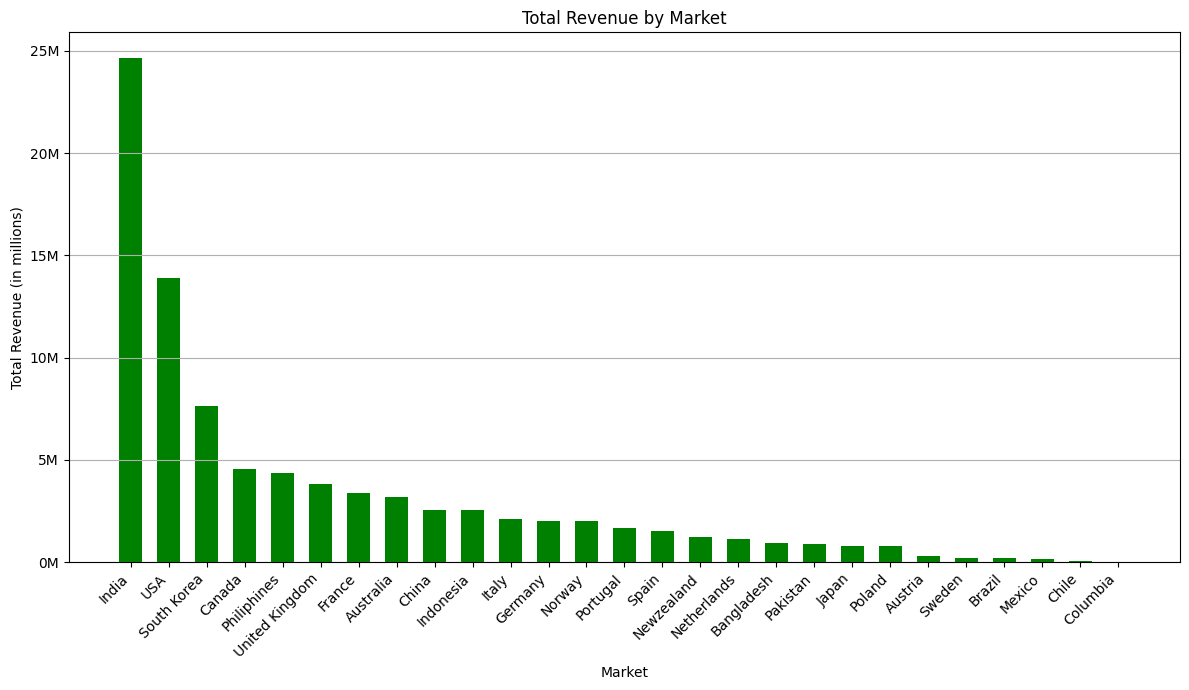

In [177]:
# sort the data by total revenue in descending order
sorted_data = aggregated_by_market.sort_values(by='total_revenue', ascending=False)

# Extract the sorted markets and revenue
markets = sorted_data['market']
revenue = sorted_data['total_revenue']

# Set up the bar width and positions
index = np.arange(len(markets))

# Plot the bars
fig, ax = plt.subplots(figsize=(12, 7))

# Revenue bars
bar1 = ax.bar(index, revenue, color='green', width=0.6)

# Labels and title
ax.set_xlabel('Market')
ax.set_ylabel('Total Revenue (in millions)')
ax.set_title('Total Revenue by Market')
ax.set_xticks(index)
ax.set_xticklabels(markets, rotation=45, ha='right')

# Format y-axis to show values in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

# Add a grid for better readability
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

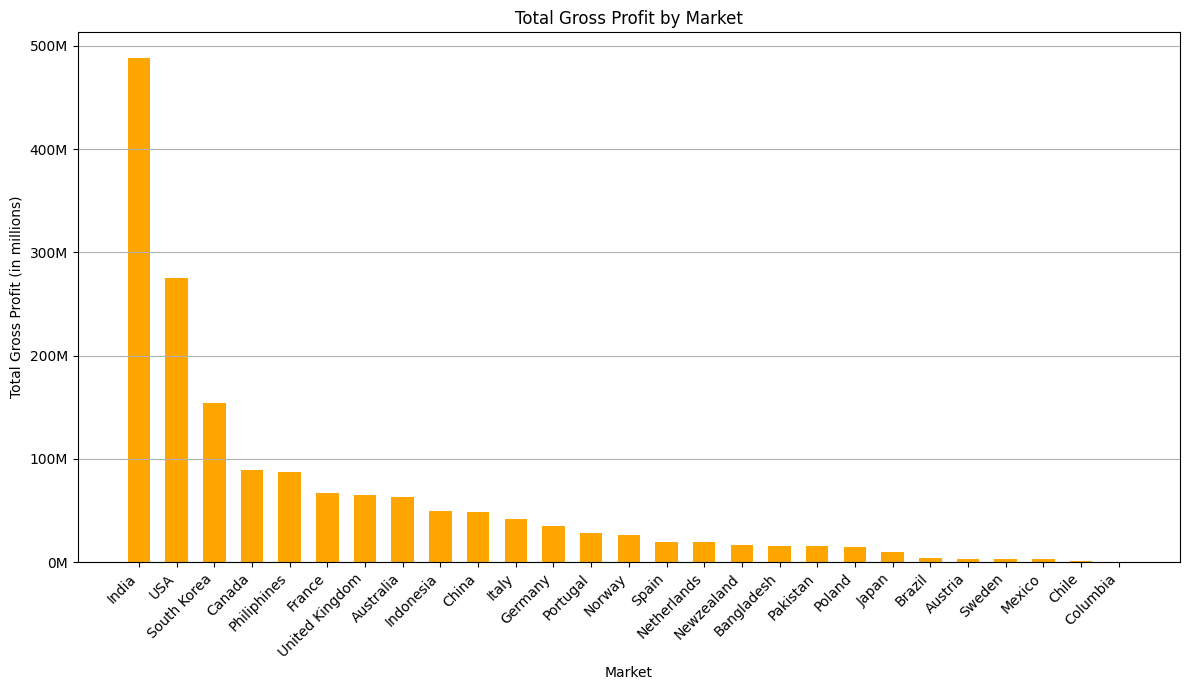

In [178]:
# sort the data by total_gross_profit in descending order
sorted_data = aggregated_by_market.sort_values(by='total_gross_profit', ascending=False)

# Extract the sorted markets and gross profit values
markets = sorted_data['market']
gross_profit = sorted_data['total_gross_profit']

# Set up the bar width and positions
index = np.arange(len(markets))

# Plot the bars
fig, ax = plt.subplots(figsize=(12, 7))

# Gross Profit bars
bar1 = ax.bar(index, gross_profit, color='orange', width=0.6)

# Labels and title
ax.set_xlabel('Market')
ax.set_ylabel('Total Gross Profit (in millions)')
ax.set_title('Total Gross Profit by Market')
ax.set_xticks(index)
ax.set_xticklabels(markets, rotation=45, ha='right')

# Format y-axis to show values in millions
formatter = plt.FuncFormatter(lambda x, pos: f'{x*1e-6:,.0f}M')
ax.yaxis.set_major_formatter(formatter)

# Add a grid for better readability
ax.grid(True, axis='y')

plt.tight_layout()
plt.show()

#### Top Markets with highest Revenue and Profit:<br>

1. India
- Total Revenue: 24,674,550<br>
- Total Gross Profit: 488,757,000<br>
- Profit Margin: 70.31%<br>

2. USA<br>
- Total Revenue: 13,890,450<br>
- Total Gross Profit: 275,000,400<br>
- Profit Margin: 70.31%<br>

3. South Korea<br>
- Total Revenue: 7,645,632<br>
- Total Gross Profit: 153,671,300<br>
- Profit Margin: 70.31%<br>

#### How Regions and Sub_zones have contributed to revenue and profit.

In [179]:
# SQL query to group by 'sub_zone' and calculate aggregations
aggregated_by_subzone_query = """
WITH AggregatedBySubZone AS (
    SELECT 
        sub_zone,
        SUM(total_gross_profit) AS total_gross_profit,
        SUM(total_revenue) AS total_revenue,
        SUM(total_sales_volume) AS total_sales_volume,
        AVG(cost_per_unit) AS cost_per_unit,
        AVG(profit_margin) AS profit_margin
    FROM aggregated_by_market
    GROUP BY sub_zone
)
SELECT 
    sub_zone,
    total_gross_profit,
    total_revenue,
    total_sales_volume,
    cost_per_unit,
    profit_margin,
    -- Calculate overall profit margin for each sub_zone
    (total_gross_profit / total_revenue) * 100 AS overall_profit_margin
FROM AggregatedBySubZone;
"""
aggregated_by_subzone = pd.read_sql_query(aggregated_by_subzone_query, con)
aggregated_by_subzone.to_sql('aggregated_by_subzone', con, if_exists='replace', index=False)
aggregated_by_subzone

,sub_zone,total_gross_profit,total_revenue,total_sales_volume,cost_per_unit,profit_margin,overall_profit_margin
0,ANZ,7.933061e+07,4.424988e+06,192601.0,6.334445,70.297649,1792.786881
1,India,4.887570e+08,2.467455e+07,1087710.0,6.039876,70.312401,1980.814300
2,LATAM,7.618687e+06,4.268774e+05,19539.0,6.435330,70.318148,1784.748448
3,NA,3.643895e+08,1.843435e+07,806893.0,6.041223,70.301956,1976.687557
4,NE,1.658474e+08,1.023631e+07,436805.0,6.356373,70.300325,1620.187191
5,ROA,3.801082e+08,1.965659e+07,863084.0,6.174164,70.317105,1933.744238
6,SE,1.565771e+08,8.702248e+06,376303.0,6.233304,70.310961,1799.272311


In [180]:
# SQL query to group by 'region' and calculate aggregations
aggregated_by_region_query = """
WITH AggregatedByRegion AS (
    SELECT 
        region,
        SUM(total_gross_profit) AS total_gross_profit,
        SUM(total_revenue) AS total_revenue,
        SUM(total_sales_volume) AS total_sales_volume,
        AVG(cost_per_unit) AS cost_per_unit,
        AVG(profit_margin) AS profit_margin
    FROM aggregated_by_market
    GROUP BY region
)
SELECT 
    region,
    total_gross_profit,
    total_revenue,
    total_sales_volume,
    cost_per_unit,
    profit_margin,
    -- Calculate overall profit margin
    (total_gross_profit / total_revenue) * 100 AS overall_profit_margin
FROM AggregatedByRegion;
"""
aggregated_by_region = pd.read_sql_query(aggregated_by_region_query, con)
aggregated_by_region.to_sql('aggregated_by_region', con, if_exists='replace', index=False)
aggregated_by_region

,region,total_gross_profit,total_revenue,total_sales_volume,cost_per_unit,profit_margin,overall_profit_margin
0,APAC,9.481958e+08,4.875613e+07,2143395.0,6.192792,70.312744,1944.772551
1,EU,3.224245e+08,1.893856e+07,813108.0,6.311621,70.304193,1702.476628
2,LATAM,7.618687e+06,4.268774e+05,19539.0,6.435330,70.318148,1784.748448
3,NA,3.643895e+08,1.843435e+07,806893.0,6.041223,70.301956,1976.687557


#### Analysis by Sub_zone:<br>

Highest:<br>
India<br>
Total Gross Profit: $488.76 million (highest)<br>
Total Revenue: $24.67 million<br>
Total Sales Volume: 1,087,710 units (highest)<br>
Cost per Unit: $6.04<br>
Overall Profit Margin: 1980.81% (highest)<br>
India stands out as the most profitable sub-zone, with the highest gross profit and sales volume. The high overall profit margin indicates significant efficiency and cost-effectiveness in this market.<br>

North America (NA)<br>
Total Gross Profit: $364.39 million<br>
Total Revenue: $18.43 million<br>
Total Sales Volume: 806,893 units<br>
Cost per Unit: $6.04<br>
Overall Profit Margin: 1976.69%<br>
North America is the second-largest contributor to gross profit, with strong sales volume and revenue. The profit margin is comparable to India.<br>

Lowest:<br>
Australia and New Zealand (ANZ)<br>
Total Gross Profit: $79.33 million (lowest)<br>
Total Revenue: $4.42 million<br>
Total Sales Volume: 192,601 units (lowest)<br>
Cost per Unit: $6.33<br>
Overall Profit Margin: 1792.79%<br>
ANZ is the smallest contributor in terms of gross profit and sales volume. Despite the lower scale, the overall profit margin is relatively high, showing that the market, while small, is profitable.

Latin America (LATAM)<br>
Total Gross Profit: $7.62 million (second lowest)<br>
Total Revenue: $426.88 thousand (lowest)<br>
Total Sales Volume: 19,539 units (second lowest)<br>
Cost per Unit: $6.43<br>
Overall Profit Margin: 1784.75%<br>
LATAM shows the smallest scale in terms of revenue and sales volume, with a high cost per unit. The overall profit margin is still robust, but the low scale suggests this region may have untapped potential, or the market size is inherently limited.<br>

#### Analysis by Region:<br>

Asia-Pacific (APAC)<br>
Total Gross Profit: $948.20 million (highest)<br>
Total Revenue: $48.76 million<br>
Total Sales Volume: 2,143,395 units (highest)<br>
Cost per Unit: $6.19<br>
Overall Profit Margin: 1944.77% (highest)<br>
APAC stands out as the highest contributor in terms of gross profit and sales volume. The region's low cost per unit and high profit margin indicate effective cost management and strong market performance.

North America (NA)<br>
Total Gross Profit: $364.39 million<br>
Total Revenue: $18.43 million<br>
Total Sales Volume: 806,893 units<br>
Cost per Unit: $6.04 (lowest)<br>
Overall Profit Margin: 1976.69%<br>
North America is a key region with substantial gross profit and revenue, alongside a very low cost per unit. The high overall profit margin reflects a well-optimized cost structure and effective pricing, making NA a critical region for the company's profitability.

Latin America (LATAM)<br>
Total Gross Profit: $7.62 million (lowest)<br>
Total Revenue: $426.88 thousand<br>
Total Sales Volume: 19,539 units (lowest)<br>
Cost per Unit: $6.44 (highest)<br>
Overall Profit Margin: 1784.75%<br>
LATAM shows the lowest figures in terms of gross profit, revenue, and sales volume. The high cost per unit and relatively lower contribution to overall profit suggest that LATAM may be a smaller or less efficient market.

#### Aggregate the data by Platform.

In [181]:
# query to aggregate data by platform
query_platform = """
WITH gross_profit_calculation AS (
    SELECT 
        dc.platform,
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fsm.fiscal_year,
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly_clean fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
total_revenue AS (
    SELECT 
        dc.platform,
        fsm.fiscal_year,
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly_clean fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.platform, fsm.fiscal_year
),
total_sales_volume AS (
    SELECT 
        dc.platform,
        fsm.fiscal_year,
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly_clean fsm
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.platform, fsm.fiscal_year
),
cost_per_unit_calculation AS (
    SELECT
        dc.platform,
        fsm.fiscal_year,
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly_clean fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY
        dc.platform, fsm.fiscal_year
),
aggregated_data AS (
    SELECT 
        gp.platform,
        gp.fiscal_year,
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly_clean fsm ON gp.product_code = fsm.product_code AND gp.customer_code = fsm.customer_code
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.platform, gp.fiscal_year
)
SELECT 
    ad.platform,
    ad.fiscal_year,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.platform = tr.platform AND ad.fiscal_year = tr.fiscal_year
INNER JOIN 
    total_sales_volume tsv ON ad.platform = tsv.platform AND ad.fiscal_year = tsv.fiscal_year
INNER JOIN
    cost_per_unit_calculation cp ON ad.platform = cp.platform AND ad.fiscal_year = cp.fiscal_year
ORDER BY 
    ad.platform, ad.fiscal_year;
"""
aggregated_by_platform = pd.read_sql_query(query_platform, con)
aggregated_by_platform.to_sql('aggregated_by_platform', con, if_exists='replace', index=False)
aggregated_by_platform

,platform,fiscal_year,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,Brick & Mortar,2018.0,4.683325e+07,24.309417,2.083471e+06,116973.0,5.306371
1,Brick & Mortar,2019.0,1.064429e+08,32.447220,4.720804e+06,269764.0,5.160057
2,Brick & Mortar,2020.0,1.707549e+08,38.601246,8.196314e+06,398913.0,6.060383
3,Brick & Mortar,2021.0,3.245576e+08,62.060379,1.765635e+07,757537.0,6.924479
4,Brick & Mortar,2022.0,5.067102e+08,322.467951,2.830557e+07,1114440.0,7.576067
5,E-Commerce,2018.0,1.941182e+07,23.036458,8.605400e+05,48298.0,5.305611
6,E-Commerce,2019.0,4.350467e+07,31.623064,1.920800e+06,109755.0,5.161523
7,E-Commerce,2020.0,1.036104e+08,55.058569,4.976603e+06,241671.0,6.059297
8,E-Commerce,2021.0,1.288791e+08,59.084898,7.004823e+06,300406.0,6.924400
9,E-Commerce,2022.0,1.919235e+08,295.492388,1.083063e+07,425178.0,7.576067


In [182]:
# create a pivot table to structure the data for plotting
revenue_over_time = aggregated_by_platform.pivot(index='fiscal_year', columns='platform', values='total_revenue')

# Initialize the Plotly figure
fig = go.Figure()

# Plot each platform
for platform in revenue_over_time.columns:
    fig.add_trace(
        go.Scatter(
            x=revenue_over_time.index,
            y=revenue_over_time[platform] / 1e6,
            mode='lines+markers',
            name=platform,
            line=dict(width=2),
            marker=dict(size=8)
        )
    )

# Update x-axis properties
fig.update_xaxes(
    title_text='Fiscal Year',
    tickvals=revenue_over_time.index,
    ticktext=[str(int(year)) for year in revenue_over_time.index],
)

# Update y-axis properties
fig.update_yaxes(
    title_text='Total Revenue (in Millions)',
    tickprefix='$',
    tickformat=',.0f',
    ticksuffix='M'
)

# Update layout properties
fig.update_layout(
    title_text='Total Revenue by Platform Over Time',
    legend_title_text='Platform',
    xaxis_title='Fiscal Year',
    yaxis_title='Total Revenue (in Millions)',
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h'),
    grid=dict(rows=1, columns=1)
)

fig.show()

In [183]:
# create a pivot table to structure the data for plotting
revenue_over_time = aggregated_by_platform.pivot(index='fiscal_year', columns='platform', values='total_gross_profit')

# Initialize the Plotly figure
fig = go.Figure()

# Plot each platform
for platform in revenue_over_time.columns:
    fig.add_trace(
        go.Scatter(
            x=revenue_over_time.index,
            y=revenue_over_time[platform] / 1e6,
            mode='lines+markers',
            name=platform,
            line=dict(width=2),
            marker=dict(size=8)
        )
    )

# Update x-axis properties
fig.update_xaxes(
    title_text='Fiscal Year',
    tickvals=revenue_over_time.index,
    ticktext=[str(int(year)) for year in revenue_over_time.index]
)

# Update y-axis properties
fig.update_yaxes(
    title_text='Total Gross Profit (in Millions)',
    tickprefix='$',
    tickformat=',.0f',
    ticksuffix='M'
)

# Update layout properties
fig.update_layout(
    title_text='Total Gross Profit by Platform Over Time',
    legend_title_text='Platform',
    xaxis_title='Fiscal Year',
    yaxis_title='Total Gross Profit (in Millions)',
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h'),
    grid=dict(rows=1, columns=1)
)

fig.show()

#### Analysis:<br>

1. Brick & Mortar:<br>
Trend: Revenue for Brick & Mortar has shown a significant upward trend over the years. Starting from $4.68M in 2018, it has increased rapidly, reaching $283.06M by 2022. This indicates a strong growth trajectory, potentially driven by expanding market presence or increased consumer demand.<br>
Trend: Gross profit has also grown substantially, paralleling the revenue growth. The increase in gross profit from $46.83M in 2018 to $506.84M in 2022 indicates that the company has been successful in maintaining or enhancing its profitability as it scales.<br>
Trend: Profit margin has seen a dramatic increase, especially in recent years. The margin grew from 24.24% in 2018 to an extraordinary 322.55% in 2022. This large increase suggests significant improvements in cost management or pricing strategies, although such high margins in 2022 may warrant further investigation to ensure accuracy.<br>

2. E-Commerce:<br>
Trend: Revenue for E-Commerce has shown a steady growth trend. It increased from $1.94M in 2018 to $19.20M in 2022. This consistent growth reflects a robust expansion, although the scale is smaller compared to Brick & Mortar.<br>
Trend: Gross profit for E-Commerce has also grown significantly, similar to revenue. The profit increased from $19.41M in 2018 to $191.96M in 2022, indicating that the business has been effectively scaling its operations and managing costs.<br>
Trend: The profit margin for E-Commerce has improved notably, from 22.99% in 2018 to 295.54% in 2022. This steep rise in margin suggests improved profitability but should be reviewed for accuracy or context, as such high margins may be atypical.

#### Aggregate the data by Channel.

In [184]:
# query to aggregate data by channel
query_channel = """
WITH gross_profit_calculation AS (
    SELECT 
        dc.channel,
        fsm.product_code,
        fsm.customer_code,
        fsm.sold_quantity,
        fgp.gross_price,
        fmc.manufacturing_cost,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit
    FROM 
        fact_sales_monthly_clean fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
total_revenue AS (
    SELECT 
        dc.channel,
        SUM(fsm.sold_quantity * fgp.gross_price) AS total_revenue
    FROM 
        fact_sales_monthly_clean fsm
    JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.channel
),
total_sales_volume AS (
    SELECT 
        dc.channel,
        SUM(fsm.sold_quantity) AS total_sales_volume
    FROM 
        fact_sales_monthly_clean fsm
    JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY 
        dc.channel
),
cost_per_unit_calculation AS (
    SELECT
        dc.channel,
        AVG(fmc.manufacturing_cost) AS cost_per_unit
    FROM
        fact_sales_monthly_clean fsm
    INNER JOIN
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
    GROUP BY
        dc.channel
),
aggregated_data AS (
    SELECT 
        gp.channel,
        SUM(gp.gross_profit) AS total_gross_profit,
        (SUM(gp.gross_profit) / SUM(fsm.sold_quantity * fgp.gross_price)) * 100 AS profit_margin
    FROM 
        gross_profit_calculation gp
    INNER JOIN 
        fact_sales_monthly_clean fsm ON gp.product_code = fsm.product_code AND gp.customer_code = fsm.customer_code
    INNER JOIN 
        fact_gross_price fgp ON gp.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    GROUP BY 
        gp.channel
)
SELECT 
    ad.channel,
    ad.total_gross_profit,
    ad.profit_margin,
    tr.total_revenue,
    tsv.total_sales_volume,
    cp.cost_per_unit
FROM 
    aggregated_data ad
INNER JOIN 
    total_revenue tr ON ad.channel = tr.channel
INNER JOIN 
    total_sales_volume tsv ON ad.channel = tsv.channel
INNER JOIN
    cost_per_unit_calculation cp ON ad.channel = cp.channel
ORDER BY 
    ad.channel;
"""
aggregated_by_channel = pd.read_sql_query(query_channel, con)
aggregated_by_channel.to_sql('aggregated_by_channel', con, if_exists='replace', index=False)
aggregated_by_channel

,channel,total_gross_profit,profit_margin,total_revenue,total_sales_volume,cost_per_unit
0,Direct,2.613795e+08,70.303237,1.379113e+07,604891.0,6.168363
1,Distributor,2.006501e+08,70.318711,1.006215e+07,443286.0,6.040547
2,Retailer,1.180599e+09,70.310168,6.270263e+07,2734758.0,6.198456


In [271]:
# extract the 'channel' and 'total_revenue' columns
channels = aggregated_by_channel['channel'].values
total_revenue = aggregated_by_channel['total_revenue'].values

# Create the bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=channels, y=total_revenue, marker_color='skyblue', text=total_revenue)])

# Add titles and labels
fig.update_layout(
    title='Total Revenue by Channel',
    xaxis_title='Channel',
    yaxis_title='Total Revenue (in Millions)',
    yaxis_tickformat=",.0f",
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    width=800, height=500,
)

# Add grid lines
fig.update_yaxes(showgrid=True, gridwidth=0.7, gridcolor='lightgrey')

# Add text labels inside bars (values in millions)
fig.update_traces(texttemplate='%{text:.2s}M', textposition='outside')

fig.show()


In [272]:
# extract the 'channel' and 'total_gross_profit' columns
channels = aggregated_by_channel['channel'].values
total_gross_profit = aggregated_by_channel['total_gross_profit'].values

# Create the bar plot using Plotly
fig = go.Figure(data=[go.Bar(x=channels, y=total_gross_profit, marker_color='lightcoral', text=total_gross_profit)])

# Add titles and labels
fig.update_layout(
    title='Total Gross Profit by Channel',
    xaxis_title='Channel',
    yaxis_title='Total Gross Profit (in Millions)',
    yaxis_tickformat=",.0f",
    xaxis_tickangle=-45,
    plot_bgcolor='white',
    width=800, height=500
)

# Add grid lines for better readability
fig.update_yaxes(showgrid=True, gridwidth=0.7, gridcolor='lightgrey')

# Add value labels inside the upper part of each bar (values in millions)
fig.update_traces(texttemplate='%{text:.2f}M', textposition='outside')

fig.show()

#### Analysis:<br>

Retailer:<br>
Revenue: $62.70M<br>
Gross Profit: $118.10M<br>
Profit Margin: 70.31%<br>

Revenue: Retailers are the top channel by revenue, reflecting a strong market share and significant sales volume.<br>
Gross Profit: Retailers lead in gross profit, showing effective cost management and higher profitability compared to other channels.
Profit Margin: The profit margin for Retailers is high, indicating strong profitability relative to revenue.<br>
The Retailer channel stands out as the most financially robust channel, with the highest revenue and gross profit, alongside a strong profit margin. This performance suggests that the Retailer channel is an important contributor to the company's financial success.

#### Aggregate the data by Customer.

In [187]:
# query to aggregate data by customer
query_customer = """
WITH gross_profit_calculation AS (
    SELECT 
        fsm.customer_code,
        fsm.product_code,
        fsm.sold_quantity,
        fsm.fiscal_year,
        fgp.gross_price,
        fmc.manufacturing_cost,
        dc.market,
        (fgp.gross_price - fmc.manufacturing_cost) AS gross_profit_per_unit,
        (fsm.sold_quantity * (fgp.gross_price - fmc.manufacturing_cost)) AS gross_profit,
        (fsm.sold_quantity * fgp.gross_price) AS revenue
    FROM 
        fact_sales_monthly_clean fsm
    INNER JOIN 
        fact_gross_price fgp ON fsm.product_code = fgp.product_code AND fsm.fiscal_year = fgp.fiscal_year
    INNER JOIN 
        fact_manufacturing_cost fmc ON fsm.product_code = fmc.product_code AND fsm.fiscal_year = fmc.cost_year
    INNER JOIN 
        dim_customer dc ON fsm.customer_code = dc.customer_code
),
discounts_customer AS (
    SELECT 
        fpd.customer_code,
        SUM((gp.gross_profit * (fpd.pre_invoice_discount_pct / 100))) AS total_discount
    FROM 
        gross_profit_calculation gp
    LEFT JOIN 
        fact_pre_discount fpd ON gp.customer_code = fpd.customer_code AND gp.fiscal_year = fpd.fiscal_year
    GROUP BY 
        fpd.customer_code
),
frequency_purchase_customer AS (
    SELECT 
        fsm.customer_code,
        COUNT(DISTINCT fsm.date) AS purchase_frequency
    FROM 
        fact_sales_monthly_clean fsm
    GROUP BY 
        fsm.customer_code
),
cltv_customer AS (
    SELECT 
        gp.customer_code,
        SUM(gp.gross_profit) AS customer_lifetime_value
    FROM 
        gross_profit_calculation gp
    GROUP BY 
        gp.customer_code
),
market_segment_contribution AS (
    SELECT 
        gp.market,
        gp.customer_code,
        SUM(gp.revenue) AS market_contribution
    FROM 
        gross_profit_calculation gp
    GROUP BY 
        gp.market, gp.customer_code
),
churn_customer_segment AS (
    SELECT 
        fsm.customer_code,
        CASE 
            WHEN MAX(fsm.fiscal_year) < (SELECT MAX(fiscal_year) FROM fact_sales_monthly_clean) THEN 1
            ELSE 0
        END AS churn_status
    FROM 
        fact_sales_monthly_clean fsm
    GROUP BY 
        fsm.customer_code
)
SELECT 
    gp.customer_code,
    SUM(gp.revenue) AS revenue_per_customer,
    SUM(gp.gross_profit) AS gross_profit_per_customer,
    SUM(gp.sold_quantity) AS total_sales_volume_per_customer,
    cltv.customer_lifetime_value,
    dc.total_discount AS discounts_customer,
    fp.purchase_frequency AS frequency_purchase_customer,
    churn.churn_status AS churn_customer_segment,
    ms.market_contribution
FROM 
    gross_profit_calculation gp
LEFT JOIN 
    discounts_customer dc ON gp.customer_code = dc.customer_code
LEFT JOIN 
    frequency_purchase_customer fp ON gp.customer_code = fp.customer_code
LEFT JOIN 
    cltv_customer cltv ON gp.customer_code = cltv.customer_code
LEFT JOIN 
    churn_customer_segment churn ON gp.customer_code = churn.customer_code
LEFT JOIN 
    market_segment_contribution ms ON gp.customer_code = ms.customer_code
GROUP BY 
    gp.customer_code, cltv.customer_lifetime_value, dc.total_discount, fp.purchase_frequency, churn.churn_status, ms.market_contribution
ORDER BY 
    ms.market_contribution DESC;  -- Sort by market contribution in descending order
"""

aggregated_customer = pd.read_sql_query(query_customer, con)
aggregated_customer.to_sql('aggregated_customer', con, if_exists='replace', index=False)
aggregated_customer.head(10)

,customer_code,revenue_per_customer,gross_profit_per_customer,total_sales_volume_per_customer,customer_lifetime_value,discounts_customer,frequency_purchase_customer,churn_customer_segment,market_contribution
0,80007195.0,2.782356e+06,1.955240e+06,124143.0,1.955240e+06,5359.215299,39,0,2.782356e+06
1,80007196.0,2.753139e+06,1.937658e+06,122606.0,1.937658e+06,5170.810954,39,0,2.753139e+06
2,90002008.0,2.332788e+06,1.642109e+06,103200.0,1.642109e+06,4033.250017,39,0,2.332788e+06
3,90002009.0,1.678228e+06,1.180257e+06,73525.0,1.180257e+06,2918.611667,39,0,1.678228e+06
4,80001019.0,1.623534e+06,1.142314e+06,69194.0,1.142314e+06,2428.102039,39,0,1.623534e+06
5,80006155.0,1.533944e+06,1.079200e+06,67006.0,1.079200e+06,3162.169809,39,0,1.533944e+06
6,90002015.0,1.455627e+06,1.023368e+06,63071.0,1.023368e+06,2241.271298,39,0,1.455627e+06
7,90002016.0,1.421268e+06,9.997656e+05,63128.0,9.997656e+05,2701.116223,39,0,1.421268e+06
8,90022081.0,1.389673e+06,9.771131e+05,61595.0,9.771131e+05,2420.013128,39,0,1.389673e+06
9,70002018.0,1.386284e+06,9.746350e+05,61138.0,9.746350e+05,2489.502111,39,0,1.386284e+06


#### Market Contribution: This metric helps in understanding how much each customer contributes to the performance of a market segment (e.g., North America, Europe, APAC, etc.). It can also highlight the most valuable customers within a specific geographic or market segment, allowing for targeted sales and marketing strategies.<br>

#### The above table is sorted in descendent order by Market Contribution to see the Customers who contributed the most to the market.

In [188]:
# query to calculate churn rate
churn_query = """
SELECT DISTINCT churn_customer_segment
FROM aggregated_customer;
"""
churn = pd.read_sql_query(churn_query, con)
print(churn)

   churn_customer_segment
0                       0


#### The value for churn is 0, it means that the customer has not churned, or in other words, they are still active and making purchases.

In [281]:
# sort by customer lifetime value to highlight top customers
top_customers = aggregated_customer.sort_values(by='customer_lifetime_value', ascending=False).head(10)

# Merge with dim_customer to get market information
top_customers = pd.merge(top_customers, dim_customer[['customer_code', 'market']], on='customer_code', how='left')

# Create a color map with custom colors for South Korea, India, and other markets
custom_colors = {
    'South Korea': 'purple',
    'India': 'lightgreen',
    'USA': 'lightblue',
    'Germany': 'lightcoral',
    'China': 'orange',
    'Japan': 'mediumpurple',
    'France': 'lightpink',
    'Canada': 'lightseagreen',
    'Philiphines': 'pink'
}

# Apply the color mapping based on the market
bar_colors = top_customers['market'].map(custom_colors)

# Create the bar plot using Plotly
fig = go.Figure(go.Bar(
    x=top_customers['customer_lifetime_value'], 
    y=top_customers['customer_code'].astype(str), 
    text=top_customers['market'], 
    orientation='h',
    marker=dict(color=bar_colors)
))

# Add titles and labels
fig.update_layout(
    title='Top 10 Customers by Customer Lifetime Value (CLTV)',
    xaxis_title='Customer Lifetime Value (in Millions)',
    yaxis_title='Customer Code',
    xaxis_tickformat=",.0f",
    plot_bgcolor='white',
    width=900, height=600
)

# Invert the y-axis to have the highest CLTV at the top
fig.update_yaxes(autorange="reversed")

# Add grid lines for better readability
fig.update_xaxes(showgrid=True, gridwidth=0.7, gridcolor='lightgrey')

fig.show()

#### Analysis:<br>

India stands out as the top market both in terms of revenue and profit. The presence of several top CLTV customers further emphasizes India's critical role in the business. High CLTV customers suggest a strong long-term relationship with significant revenue potential. The substantial revenue and profit generated from these customers highlight India as a vital market with promising growth and sustainability prospects.<br>

South Korea ranks third in revenue and profit. Despite being lower than India and the USA, South Korea has two major CLTV customers. This indicates that while the overall market performance is not as high, the existing high-value customers have substantial potential. The focus on these key customers could be beneficial for future growth.

#### Customer Analysis.

#### Create Cohorts:

In [190]:
# create a common table expression (CTE) to find the first purchase month for each customer
cohort_size_query = """
WITH FirstPurchase AS (
    SELECT
        customer_code,
        MIN(strftime('%Y-%m', date)) AS first_purchase_month
    FROM fact_sales_monthly_clean
    GROUP BY customer_code
)

-- Step 2: Calculate the cohort sizes
SELECT
    first_purchase_month,
    COUNT(*) AS cohort_size
FROM FirstPurchase
GROUP BY first_purchase_month
ORDER BY first_purchase_month;
"""
cohort_size = pd.read_sql_query(cohort_size_query, con)
cohort_size

,first_purchase_month,cohort_size
0,2017-09,75
1,2017-10,25
2,2018-09,45
3,2018-10,15
4,2019-09,37
5,2019-10,12


#### The cohort size data indicates that unique customers made their first purchase only in September and October of each year, and not in other months, it suggests specific patterns or anomalies in customer acquisition.

In [191]:
# aggregate sales data by month and year
unique_customers_query = """
WITH MonthlySales AS (
    SELECT
        strftime('%Y-%m', date) AS year_month,
        SUM(sold_quantity) AS total_sold_quantity,
        COUNT(DISTINCT customer_code) AS unique_customers
    FROM fact_sales_monthly_clean
    GROUP BY year_month
)
SELECT year_month, total_sold_quantity, unique_customers
FROM MonthlySales
ORDER BY year_month;
"""
unique_customers = pd.read_sql_query(unique_customers_query, con)
unique_customers.to_sql('unique_customers', con, if_exists='replace', index=False)
unique_customers.head()

,year_month,total_sold_quantity,unique_customers
0,2017-09,11425.0,75
1,2017-10,14860.0,76
2,2017-11,21012.0,75
3,2017-12,21615.0,74
4,2018-01,11713.0,75


In [192]:
# convert 'year_month' to datetime if not already
unique_customers['year_month'] = pd.to_datetime(unique_customers['year_month'])

# Calculate the average unique customers for adding the reference line
average_unique_customers = unique_customers['unique_customers'].mean()

# Plotting using Plotly Express
fig = px.line(unique_customers,
              x='year_month',
              y='unique_customers',
              title='Unique Customers by Month',
              labels={'year_month': 'Month', 'unique_customers': 'Unique Customers'},
              markers=True)

# Adding a horizontal reference line for average unique customers
fig.add_hline(y=average_unique_customers,
              line_dash="dash",
              line_color="purple")

# Adding an annotation for the average reference line
fig.add_annotation(x=unique_customers['year_month'].iloc[0], y=average_unique_customers,
                   text='Avg Unique Customers',
                   showarrow=True,
                   arrowhead=1)

# Customizing x-axis to show all months
fig.update_xaxes(
    dtick="M3",
    tickformat="%b\n%Y"
)

fig.show()

#### We can see in fact that on the months of September and October for each year the number of customers increase dramatically, and after 2019 it keeps steady to the end of the period.

In [193]:
# Define the SQL query
sql_query = """
WITH JoinedData AS (
    SELECT
        ac.customer_code,
        ac.revenue_per_customer,
        ac.gross_profit_per_customer,
        ac.total_sales_volume_per_customer,
        ac.customer_lifetime_value,
        ac.discounts_customer,
        ac.frequency_purchase_customer,
        ac.churn_customer_segment,
        ac.market_contribution,
        fsc.date
    FROM aggregated_customer ac
    JOIN fact_sales_monthly_clean fsc
    ON ac.customer_code = fsc.customer_code
)
SELECT *
FROM JoinedData;
"""
# Execute the query and create a DataFrame
new_joined_df = pd.read_sql_query(sql_query, con)
new_joined_df.to_sql('new_joined_df', con, if_exists='replace', index=False)
# Display the new DataFrame
new_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67178 entries, 0 to 67177
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   customer_code                    67178 non-null  float64
 1   revenue_per_customer             67178 non-null  float64
 2   gross_profit_per_customer        67178 non-null  float64
 3   total_sales_volume_per_customer  67178 non-null  float64
 4   customer_lifetime_value          67178 non-null  float64
 5   discounts_customer               67178 non-null  float64
 6   frequency_purchase_customer      67178 non-null  int64  
 7   churn_customer_segment           67178 non-null  int64  
 8   market_contribution              67178 non-null  float64
 9   date                             67178 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 5.1+ MB


In [194]:
# convert 'date' to datetime
new_joined_df['date'] = pd.to_datetime(new_joined_df['date'])

# Create a 'year_month' column for grouping
new_joined_df['year_month'] = new_joined_df['date'].dt.to_period('M')

# Group by 'year_month' and calculate the total revenue per month
monthly_revenue = new_joined_df.groupby('year_month')['revenue_per_customer'].sum().reset_index()

# Convert 'year_month' to datetime for plotting
monthly_revenue['year_month'] = monthly_revenue['year_month'].dt.to_timestamp()

# Calculate the average revenue for adding the reference line
average_revenue = monthly_revenue['revenue_per_customer'].mean()

# Plotting using Plotly Express
fig = px.line(monthly_revenue,
              x='year_month',
              y='revenue_per_customer',
              title='Total Revenue Per Month',
              labels={'year_month': 'Month', 'revenue_per_customer': 'Total Revenue'})

# Adding a horizontal reference line for average revenue
fig.add_hline(y=average_revenue,
              line_dash="dash",
              line_color="purple")

# Adding an annotation for the average reference line
fig.add_annotation(x=monthly_revenue['year_month'].iloc[0], y=average_revenue,
                   text='Avg Revenue',
                   showarrow=True,
                   arrowhead=1)

# Customizing x-axis to show all months
fig.update_xaxes(
    dtick="M3",
    tickformat="%b\n%Y"
)

fig.show()

#### We can see that there is a similar pattern on the acquisition of customers with the revenue over time.

#### Aggregate the data by Category.

In [195]:
# fetch unique categories from the df
unique_categories = """SELECT DISTINCT category
FROM dim_product
ORDER BY category;
"""
categories = pd.read_sql_query(unique_categories, con)
categories

,category
0,Batteries
1,Business Laptop
2,External Solid State Drives
3,Gaming Laptop
4,Graphic Card
5,Internal HDD
6,Keyboard
7,MotherBoard
8,Mouse
9,Personal Desktop


In [196]:
# rename the cost_year column in fact_manufacturing_cost table as fiscal_year
cost_year_query = """
SELECT 
    product_code,
    cost_year AS fiscal_year,
    manufacturing_cost
FROM 
    fact_manufacturing_cost;
"""

fact_manufacturing_renamed = pd.read_sql_query(cost_year_query, con)
fact_manufacturing_renamed.to_sql('fact_manufacturing_renamed', con, if_exists='replace', index=False)
fact_manufacturing_renamed.head()

,product_code,fiscal_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036


In [197]:
# compute the revenue, gross profit, profit margin, total sales volume, and cost per unit of each product_code
product_query = """
WITH product_sales AS (
    SELECT
        fsm.product_code,
        fsm.fiscal_year,
        SUM(fsm.sold_quantity) AS total_sold_quantity
    FROM
        fact_sales_monthly_clean fsm
    GROUP BY
        fsm.product_code, fsm.fiscal_year
),
product_revenue AS (
    SELECT
        ps.product_code,
        ps.fiscal_year,
        SUM(ps.total_sold_quantity * fgp.gross_price) AS revenue
    FROM
        product_sales ps
    LEFT JOIN
        fact_gross_price fgp 
        ON ps.product_code = fgp.product_code 
        AND ps.fiscal_year = fgp.fiscal_year
    GROUP BY
        ps.product_code, ps.fiscal_year
),
product_cost AS (
    SELECT
        ps.product_code,
        ps.fiscal_year,
        SUM(ps.total_sold_quantity * fmr.manufacturing_cost) AS total_cost
    FROM
        product_sales ps
    LEFT JOIN
        fact_manufacturing_renamed fmr 
        ON ps.product_code = fmr.product_code 
        AND ps.fiscal_year = fmr.fiscal_year
    GROUP BY
        ps.product_code, ps.fiscal_year
),
gross_profit_calculation AS (
    SELECT
        pr.product_code,
        pr.fiscal_year,
        pr.revenue,
        (pr.revenue - COALESCE(pc.total_cost, 0)) AS gross_profit,
        CASE 
            WHEN pr.revenue > 0 THEN ((pr.revenue - COALESCE(pc.total_cost, 0)) / pr.revenue) * 100
            ELSE 0
        END AS profit_margin,
        COALESCE(ps.total_sold_quantity, 0) AS total_sales_volume,
        CASE 
            WHEN COALESCE(ps.total_sold_quantity, 0) > 0 THEN (COALESCE(pc.total_cost, 0) / COALESCE(ps.total_sold_quantity, 0))
            ELSE 0
        END AS cost_per_unit
    FROM
        product_revenue pr
    LEFT JOIN
        product_cost pc 
        ON pr.product_code = pc.product_code 
        AND pr.fiscal_year = pc.fiscal_year
    LEFT JOIN
        product_sales ps
        ON pr.product_code = ps.product_code
        AND pr.fiscal_year = ps.fiscal_year
)
SELECT
    gpc.product_code,
    gpc.fiscal_year,
    gpc.revenue,
    gpc.gross_profit,
    gpc.profit_margin,
    gpc.total_sales_volume,
    gpc.cost_per_unit
FROM
    gross_profit_calculation gpc
ORDER BY
    gpc.product_code, gpc.fiscal_year;
"""

metrics_by_product = pd.read_sql_query(product_query, con)
metrics_by_product.to_sql('metrics_by_product', con, if_exists='replace', index=False)
metrics_by_product.head()

,product_code,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,A0118150101,2018.0,2.873360e+05,2.011270e+05,69.997142,18664.0,4.6190
1,A0118150101,2019.0,6.007862e+05,4.258953e+05,70.889661,41608.0,4.2033
2,A0118150101,2020.0,1.016645e+06,7.021937e+05,69.069694,62631.0,5.0207
3,A0118150101,2021.0,1.906473e+06,1.354538e+06,71.049414,100039.0,5.5172
4,A0118150102,2018.0,3.516544e+05,2.510530e+05,71.391959,17953.0,5.6036


In [198]:
metrics_by_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        49 non-null     object 
 1   fiscal_year         49 non-null     float64
 2   revenue             49 non-null     float64
 3   gross_profit        49 non-null     float64
 4   profit_margin       49 non-null     float64
 5   total_sales_volume  49 non-null     float64
 6   cost_per_unit       49 non-null     float64
dtypes: float64(6), object(1)
memory usage: 2.8+ KB


#### This output reveals inconsistency on the aggregations and on the existence of combined values for all the tables used. I will research this deeper.

In [199]:
# query for unique combinations of product_code and fiscal_year in fact_sales_monthly
query_sales = """
SELECT DISTINCT product_code, fiscal_year
FROM fact_sales_monthly;
"""
sales_combinations = pd.read_sql_query(query_sales, con)
sales_combinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_code  49 non-null     object 
 1   fiscal_year   49 non-null     float64
dtypes: float64(1), object(1)
memory usage: 916.0+ bytes


In [200]:
# query for unique combinations of product_code and fiscal_year in fact_gross_price
query_gross_price = """
SELECT DISTINCT product_code, fiscal_year
FROM fact_gross_price;
"""
gross_price_combinations = pd.read_sql_query(query_gross_price, con)
gross_price_combinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  1182 non-null   object
 1   fiscal_year   1182 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.6+ KB


In [201]:
# query for unique combinations of product_code and fiscal_year in fact_manufacturing_renamed
query_manufacturing = """
SELECT DISTINCT product_code, fiscal_year
FROM fact_manufacturing_renamed;
"""
manufacturing_combinations = pd.read_sql_query(query_manufacturing, con)
manufacturing_combinations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  1182 non-null   object
 1   fiscal_year   1182 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 18.6+ KB


In [202]:
# to identify records from the fact_sales_monthly table that don't have a corresponding entry in the fact_gross_price table based on matching product_code and fiscal_year. 
query_missing_gross_price = """
SELECT fs.product_code, fs.fiscal_year
FROM fact_sales_monthly fs
LEFT JOIN fact_gross_price fgp ON fs.product_code = fgp.product_code AND fs.fiscal_year = fgp.fiscal_year
WHERE fgp.product_code IS NULL;
"""
missing_in_gross_price = pd.read_sql_query(query_missing_gross_price, con)
missing_in_gross_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  0 non-null      object
 1   fiscal_year   0 non-null      object
dtypes: object(2)
memory usage: 132.0+ bytes


#### There are no records in fact_sales_monthly that are missing from fact_gross_price for the matched product_code and fiscal_year.

In [203]:
# get all combinations of product_code and fiscal_year from all tables
query_all_combinations = """
WITH all_combinations AS (
    SELECT DISTINCT
        fsm.product_code,
        fsm.fiscal_year
    FROM fact_sales_monthly fsm
    UNION
    SELECT DISTINCT
        fgp.product_code,
        fgp.fiscal_year
    FROM fact_gross_price fgp
    UNION
    SELECT DISTINCT
        fmr.product_code,
        fmr.fiscal_year
    FROM fact_manufacturing_renamed fmr
),

product_sales AS (
    SELECT
        product_code,
        fiscal_year,
        COALESCE(SUM(sold_quantity), 0) AS total_sold_quantity
    FROM fact_sales_monthly
    GROUP BY product_code, fiscal_year
),

product_revenue AS (
    SELECT
        ps.product_code,
        ps.fiscal_year,
        COALESCE(SUM(ps.total_sold_quantity * fgp.gross_price), 0) AS revenue
    FROM product_sales ps
    LEFT JOIN fact_gross_price fgp ON ps.product_code = fgp.product_code AND ps.fiscal_year = fgp.fiscal_year
    GROUP BY ps.product_code, ps.fiscal_year
),

product_cost AS (
    SELECT
        ps.product_code,
        ps.fiscal_year,
        COALESCE(SUM(ps.total_sold_quantity * fmr.manufacturing_cost), 0) AS total_cost
    FROM product_sales ps
    LEFT JOIN fact_manufacturing_renamed fmr ON ps.product_code = fmr.product_code AND ps.fiscal_year = fmr.fiscal_year
    GROUP BY ps.product_code, ps.fiscal_year
),

gross_profit_calculation AS (
    SELECT
        ac.product_code,
        ac.fiscal_year,
        COALESCE(pr.revenue, 0) AS revenue,
        COALESCE(pr.revenue, 0) - COALESCE(pc.total_cost, 0) AS gross_profit,
        CASE 
            WHEN COALESCE(pr.revenue, 0) > 0 THEN ((COALESCE(pr.revenue, 0) - COALESCE(pc.total_cost, 0)) / COALESCE(pr.revenue, 0)) * 100
            ELSE 0
        END AS profit_margin,
        COALESCE(ps.total_sold_quantity, 0) AS total_sales_volume,
        CASE 
            WHEN COALESCE(ps.total_sold_quantity, 0) > 0 THEN (COALESCE(pc.total_cost, 0) / COALESCE(ps.total_sold_quantity, 0))
            ELSE 0
        END AS cost_per_unit
    FROM all_combinations ac
    LEFT JOIN product_revenue pr ON ac.product_code = pr.product_code AND ac.fiscal_year = pr.fiscal_year
    LEFT JOIN product_cost pc ON ac.product_code = pc.product_code AND ac.fiscal_year = pc.fiscal_year
    LEFT JOIN product_sales ps ON ac.product_code = ps.product_code AND ac.fiscal_year = ps.fiscal_year
)

SELECT
    gpc.product_code,
    gpc.fiscal_year,
    gpc.revenue,
    gpc.gross_profit,
    gpc.profit_margin,
    gpc.total_sales_volume,
    gpc.cost_per_unit
FROM gross_profit_calculation gpc
ORDER BY gpc.product_code, gpc.fiscal_year;
"""

all_combinations_df = pd.read_sql_query(query_all_combinations, con)
all_combinations_df.to_sql('all_combinations_metrics', con, if_exists='replace', index=False)
all_combinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   fiscal_year         1182 non-null   float64
 2   revenue             1182 non-null   float64
 3   gross_profit        1182 non-null   float64
 4   profit_margin       1182 non-null   float64
 5   total_sales_volume  1182 non-null   float64
 6   cost_per_unit       1182 non-null   float64
dtypes: float64(6), object(1)
memory usage: 64.8+ KB


In [204]:
all_combinations_df.head()

,product_code,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,A0118150101,2018.0,2.873360e+05,2.011270e+05,69.997142,18664.0,4.6190
1,A0118150101,2019.0,6.007862e+05,4.258953e+05,70.889661,41608.0,4.2033
2,A0118150101,2020.0,1.016645e+06,7.021937e+05,69.069694,62631.0,5.0207
3,A0118150101,2021.0,1.906473e+06,1.354538e+06,71.049414,100039.0,5.5172
4,A0118150102,2018.0,3.516544e+05,2.510530e+05,71.391959,17953.0,5.6036


#### Now it is guaranteed that there is a complete dataset with all possible combinations, and it addresses the issue of missing values properly.

In [205]:
# join all_combinations_df with dim_product tables
query_joined = """
SELECT
    ac.product_code,
    ac.fiscal_year,
    ac.revenue,
    ac.gross_profit,
    ac.profit_margin,
    ac.total_sales_volume,
    ac.cost_per_unit,
    dp.division,
    dp.segment,
    dp.category,
    dp.product,
    dp.variant
FROM all_combinations_metrics ac
JOIN dim_product dp ON ac.product_code = dp.product_code
ORDER BY ac.product_code, ac.fiscal_year;
"""

joined_df = pd.read_sql_query(query_joined, con)
joined_df.to_sql('joined_metrics', con, if_exists='replace', index=False)
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1182 entries, 0 to 1181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_code        1182 non-null   object 
 1   fiscal_year         1182 non-null   float64
 2   revenue             1182 non-null   float64
 3   gross_profit        1182 non-null   float64
 4   profit_margin       1182 non-null   float64
 5   total_sales_volume  1182 non-null   float64
 6   cost_per_unit       1182 non-null   float64
 7   division            1182 non-null   object 
 8   segment             1182 non-null   object 
 9   category            1182 non-null   object 
 10  product             1182 non-null   object 
 11  variant             1182 non-null   object 
dtypes: float64(6), object(6)
memory usage: 110.9+ KB


#### I will group by category to see how many product_code values fall under each category and then calculate the metrics by category.

In [206]:
# group by 'category' and count distinct 'product_code' values in each category
grouped_by_category = joined_df.groupby('category')['product_code'].nunique().reset_index()

# rename columns to clarity
grouped_by_category.columns = ['category', 'num_product_codes']
grouped_by_category.to_sql('grouped_by_category', con, if_exists='replace', index=False)
grouped_by_category

,category,num_product_codes
0,Batteries,20
1,Business Laptop,44
2,External Solid State Drives,15
3,Gaming Laptop,40
4,Graphic Card,36
5,Internal HDD,10
6,Keyboard,48
7,MotherBoard,20
8,Mouse,48
9,Personal Desktop,16


In [207]:
# save the DataFrames as temporary tables
all_combinations_df.to_sql('all_combinations_df', con, if_exists='replace', index=False)
grouped_by_category.to_sql('grouped_by_category', con, if_exists='replace', index=False)

14

#### I will separate the metrics for each category by fiscal_year to compare and see their evolution through the time on the business.

In [208]:
# aggregate the metrics by category from all_combinations_df for 2018
aggregate_metrics_2018 = """
WITH category_aggregations AS (
    SELECT
        dp.category,
        -- Use CASE to handle NULL values and ensure the column is cast as INTEGER
        CASE
            WHEN ac.fiscal_year IS NOT NULL THEN CAST(ac.fiscal_year AS INTEGER)
            ELSE NULL
        END AS fiscal_year,
        SUM(ac.revenue) AS revenue,
        SUM(ac.gross_profit) AS gross_profit,
        AVG(ac.profit_margin) AS profit_margin,
        SUM(ac.total_sales_volume) AS total_sales_volume,
        AVG(ac.cost_per_unit) AS cost_per_unit
    FROM
        all_combinations_df ac
    JOIN
        dim_product dp ON ac.product_code = dp.product_code
    WHERE
        ac.fiscal_year = 2018
    GROUP BY
        dp.category, ac.fiscal_year
)
SELECT
    gbc.category,
    gbc.num_product_codes,
    ca.fiscal_year,
    ca.revenue,
    ca.gross_profit,
    ca.profit_margin,
    ca.total_sales_volume,
    ca.cost_per_unit
FROM
    grouped_by_category gbc
LEFT JOIN
    category_aggregations ca ON gbc.category = ca.category
ORDER BY
    gbc.category;
"""
aggregate_metrics_2018_df = pd.read_sql_query(aggregate_metrics_2018, con)
aggregate_metrics_2018_df.to_sql('aggregate_metrics_2018', con, if_exists='replace', index=False)
aggregate_metrics_2018_df

,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
1,Business Laptop,44,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
2,External Solid State Drives,15,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
3,Gaming Laptop,40,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
4,Graphic Card,36,2018.0,1.579097e+06,1.112818e+06,56.338381,91366.0,4.076800
5,Internal HDD,10,2018.0,1.364914e+06,9.573028e+05,70.139074,73905.0,5.516325
6,Keyboard,48,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
7,MotherBoard,20,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
8,Mouse,48,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
9,Personal Desktop,16,2018.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000


In [209]:
aggregate_metrics_2018_df['fiscal_year'] = aggregate_metrics_2018_df['fiscal_year'].fillna(0).astype(int)
print(aggregate_metrics_2018_df['fiscal_year'].unique())
print(aggregate_metrics_2018_df['fiscal_year'].dtype)
aggregate_metrics_2018_df

[2018    0]
int64


,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2018,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
1,Business Laptop,44,2018,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
2,External Solid State Drives,15,2018,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
3,Gaming Laptop,40,2018,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
4,Graphic Card,36,2018,1.579097e+06,1.112818e+06,56.338381,91366.0,4.076800
5,Internal HDD,10,2018,1.364914e+06,9.573028e+05,70.139074,73905.0,5.516325
6,Keyboard,48,2018,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
7,MotherBoard,20,2018,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
8,Mouse,48,2018,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
9,Personal Desktop,16,2018,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000


#### Analysis by category for fiscal_year 2018:<br>

*Graphic Card:*<br>

Revenue: Approximately $1.58 million, making it the highest revenue-generating category in 2018.<br>
Gross Profit: Around $1.11 million, indicating a solid profit margin of approximately 56.34%.<br>
Sales Volume: 91,366 units were sold, with an average cost per unit of $4.08.<br>
This category shows a strong performance, indicating consistent demand over time.<br>

*Internal HDD:*<br>
Revenue: Around $1.36 million, making it the second-highest revenue-generating category.<br>
Gross Profit: Approximately $957,302, with a profit margin of 70.14%, which is notably high.<br>
Sales Volume: 73,905 units were sold, with an average cost per unit of $5.52.<br>
The high profit margin and significant revenue suggest that this category was also performing well, contributing notably to overall sales.<br>

*Inactive or Low Activity Categories:*<br>
This could be due to:<br>
No sales being recorded for these categories in 2018.<br>
Potential data issues or a focus on different product categories during this period

In [210]:
# aggregate the metrics by category from all_combinations_df for 2019
aggregate_metrics_2019 = """
WITH category_aggregations AS (
    SELECT
        dp.category,
        ac.fiscal_year,
        SUM(ac.revenue) AS revenue,
        SUM(ac.gross_profit) AS gross_profit,
        AVG(ac.profit_margin) AS profit_margin,
        SUM(ac.total_sales_volume) AS total_sales_volume,
        AVG(ac.cost_per_unit) AS cost_per_unit
    FROM
        all_combinations_df ac
    JOIN
        dim_product dp ON ac.product_code = dp.product_code
    WHERE
        ac.fiscal_year = 2019
    GROUP BY
        dp.category, ac.fiscal_year
)
SELECT
    gbc.category,
    gbc.num_product_codes,
    ca.fiscal_year,
    ca.revenue,
    ca.gross_profit,
    ca.profit_margin,
    ca.total_sales_volume,
    ca.cost_per_unit
FROM
    grouped_by_category gbc
LEFT JOIN
    category_aggregations ca ON gbc.category = ca.category
ORDER BY
    gbc.category;
"""
aggregate_metrics_2019_df = pd.read_sql_query(aggregate_metrics_2019, con)
aggregate_metrics_2019_df.to_sql('aggregate_metrics_2019', con, if_exists='replace', index=False)
aggregate_metrics_2019_df

,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
1,Business Laptop,44,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
2,External Solid State Drives,15,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
3,Gaming Laptop,40,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
4,Graphic Card,36,2019.0,2.013284e+06,1.405212e+06,17.440062,127361.0,1.198688
5,Internal HDD,10,2019.0,4.628319e+06,3.264815e+06,70.558867,252158.0,5.407200
6,Keyboard,48,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
7,MotherBoard,20,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
8,Mouse,48,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
9,Personal Desktop,16,2019.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000


In [211]:
aggregate_metrics_2019_df['fiscal_year'] = aggregate_metrics_2019_df['fiscal_year'].fillna(0).astype(int)
print(aggregate_metrics_2019_df['fiscal_year'].unique())
print(aggregate_metrics_2019_df['fiscal_year'].dtype)
aggregate_metrics_2019_df

[2019    0]
int64


,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
1,Business Laptop,44,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
2,External Solid State Drives,15,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
3,Gaming Laptop,40,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
4,Graphic Card,36,2019,2.013284e+06,1.405212e+06,17.440062,127361.0,1.198688
5,Internal HDD,10,2019,4.628319e+06,3.264815e+06,70.558867,252158.0,5.407200
6,Keyboard,48,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
7,MotherBoard,20,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
8,Mouse,48,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
9,Personal Desktop,16,2019,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000


#### Analysis by category for fiscal_year 2019:<br>

*Graphic Card:*<br>

Revenue: Approximately $2.01 million, an increase compared to the $1.58 million in 2018.<br>
Gross Profit: Around $1.41 million, with a profit margin of 17.44%, which is significantly lower than the 56.34% margin observed in 2018.<br> This suggests either increased costs or reduced pricing.<br>
Sales Volume: 127,361 units were sold, an increase from 91,366 units in 2018. Despite the higher volume, the average cost per unit dropped to $1.20 from $4.08 in 2018, which might explain the lower profit margin.<br>
This indicates that while the sales volume increased, the profitability of the graphic cards decreased, possibly due to price competition or cost increases.<br>

*Internal HDD:*<br>

Revenue: About $4.63 million, a substantial increase from $1.36 million in 2018.<br>
Gross Profit: Approximately $3.26 million, with a consistent profit margin of 70.56%, slightly higher than the 70.14% in 2018.<br>
Sales Volume: 252,158 units were sold, significantly more than the 73,905 units sold in 2018. The average cost per unit decreased slightly to $5.41 from $5.52.<br>
This category continues to perform strongly with both high revenue and profit margins, indicating sustained demand and pricing power.<br>

*Inactive or Low Activity Categories:*<br>
These categories either had no sales or the data for these categories in 2019 is missing.


In [212]:
# aggregate the metrics by category from all_combinations_df for 2020
aggregate_metrics_2020 = """
WITH category_aggregations AS (
    SELECT
        dp.category,
        ac.fiscal_year,
        SUM(ac.revenue) AS revenue,
        SUM(ac.gross_profit) AS gross_profit,
        AVG(ac.profit_margin) AS profit_margin,
        SUM(ac.total_sales_volume) AS total_sales_volume,
        AVG(ac.cost_per_unit) AS cost_per_unit
    FROM
        all_combinations_df ac
    JOIN
        dim_product dp ON ac.product_code = dp.product_code
    WHERE
        ac.fiscal_year = 2020
    GROUP BY
        dp.category, ac.fiscal_year
)
SELECT
    gbc.category,
    gbc.num_product_codes,
    ca.fiscal_year,
    ca.revenue,
    ca.gross_profit,
    ca.profit_margin,
    ca.total_sales_volume,
    ca.cost_per_unit
FROM
    grouped_by_category gbc
LEFT JOIN
    category_aggregations ca ON gbc.category = ca.category
ORDER BY
    gbc.category;
"""
aggregate_metrics_2020_df = pd.read_sql_query(aggregate_metrics_2020, con)
aggregate_metrics_2020_df.to_sql('aggregate_metrics_2020', con, if_exists='replace', index=False)
aggregate_metrics_2020_df

,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2020.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
1,Business Laptop,44,2020.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
2,External Solid State Drives,15,2020.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
3,Gaming Laptop,40,2020.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
4,Graphic Card,36,2020.0,2.387499e+06,1.668872e+06,8.065164,137869.0,0.601446
5,Internal HDD,10,2020.0,1.078542e+07,7.580349e+06,70.234904,502715.0,6.374038
6,Keyboard,48,2020.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
7,MotherBoard,20,2020.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
8,Mouse,48,2020.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
9,Personal Desktop,16,2020.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000


#### Analysis by category for fiscal_year 2020:<br>

*Graphic Card:*<br>

Revenue: Approximately $2.39 million, an increase from $2.01 million in 2019.<br>
Gross Profit: Around $1.67 million, with a profit margin of 8.07%. This represents a decrease from 17.44% in 2019, indicating either increased costs or lower pricing.<br>
Sales Volume: 137,869 units sold, up from 127,361 units in 2019. The average cost per unit is $0.60, which is lower compared to $1.20 in 2019. The lower cost per unit may reflect pricing strategies or changes in cost structures.<br>
The "Graphic Card" category continues to contribute significantly to revenue but with a reduced profit margin, suggesting increased cost pressures or competitive pricing.<br>

*Internal HDD:*<br>

Revenue: About $10.79 million, up from $4.63 million in 2019.<br>
Gross Profit: Approximately $7.58 million, with a consistent profit margin of 70.23%, close to the 70.56% observed in 2019.<br>
Sales Volume: 502,715 units sold, a substantial increase from 252,158 units in 2019. The average cost per unit decreased to $6.37 from $5.41 in 2019.<br>
The "Internal HDD" category remains a strong performer with increased revenue and stable profit margins, indicating sustained demand and robust performance in this segment.<br>

*Inactive or Low Activity Categories:*<br>
This pattern suggests these categories either had no sales or their data is missing for 2020.

In [213]:
# aggregate the metrics by category from all_combinations_df for 2021
aggregate_metrics_2021 = """
WITH category_aggregations AS (
    SELECT
        dp.category,
        ac.fiscal_year,
        SUM(ac.revenue) AS revenue,
        SUM(ac.gross_profit) AS gross_profit,
        AVG(ac.profit_margin) AS profit_margin,
        SUM(ac.total_sales_volume) AS total_sales_volume,
        AVG(ac.cost_per_unit) AS cost_per_unit
    FROM
        all_combinations_df ac
    JOIN
        dim_product dp ON ac.product_code = dp.product_code
    WHERE
        ac.fiscal_year = 2021
    GROUP BY
        dp.category, ac.fiscal_year
)
SELECT
    gbc.category,
    gbc.num_product_codes,
    ca.fiscal_year,
    ca.revenue,
    ca.gross_profit,
    ca.profit_margin,
    ca.total_sales_volume,
    ca.cost_per_unit
FROM
    grouped_by_category gbc
LEFT JOIN
    category_aggregations ca ON gbc.category = ca.category
ORDER BY
    gbc.category;
"""
aggregate_metrics_2021_df = pd.read_sql_query(aggregate_metrics_2021, con)
aggregate_metrics_2021_df.to_sql('aggregate_metrics_2021', con, if_exists='replace', index=False)
aggregate_metrics_2021_df

,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2021.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
1,Business Laptop,44,2021.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
2,External Solid State Drives,15,2021.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
3,Gaming Laptop,40,2021.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
4,Graphic Card,36,2021.0,1.520041e+06,1.072589e+06,2.433213,77857.0,0.198176
5,Internal HDD,10,2021.0,2.314113e+07,1.624158e+07,70.184996,980086.0,7.042130
6,Keyboard,48,2021.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
7,MotherBoard,20,2021.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
8,Mouse,48,2021.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
9,Personal Desktop,16,2021.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000


#### Analysis by category for fiscal_year 2021:<br>

*Graphic Card:*<br>

Revenue: Approximately $1.52 million, a slight decrease from $2.39 million in 2020.<br>
Gross Profit: Around $1.07 million, with a reduced profit margin of 2.43%. This is significantly lower compared to the 8.07% profit margin in 2020, indicating increased costs or lower pricing.<br>
Sales Volume: 77,857 units, which is a decrease from 137,869 units in 2020. The average cost per unit is $0.20, lower than the $0.60 in 2020. This reduction in cost per unit may be a result of pricing strategies or changes in cost structure.<br>
The "Graphic Card" category continues to generate substantial revenue but at a lower profit margin, suggesting cost pressures or competitive market conditions.<br>

*Internal HDD:*<br>

Revenue: About $23.14 million, a significant increase from $10.79 million in 2020.<br>
Gross Profit: Approximately $16.24 million, with a profit margin of 70.18%, which is stable compared to the 70.23% in 2020.<br>
Sales Volume: 980,086 units, a substantial increase from 502,715 units in 2020. The average cost per unit increased to $7.04 from $6.37 in 2020, which may reflect higher costs or pricing changes.<br>
The "Internal HDD" category shows continued strong performance with increased revenue and a stable profit margin, indicating robust demand and market presence.<br>

*Inactive or Low Activity Categories:*<br>
This pattern suggests either a lack of sales in these categories or potential gaps in the data for 2021.

In [214]:
# aggregate the metrics by category from all_combinations_df for 2022
aggregate_metrics_2022 = """
WITH category_aggregations AS (
    SELECT
        dp.category,
        MAX(ac.fiscal_year) AS fiscal_year,                          
        SUM(ac.revenue) AS revenue,                                  
        SUM(ac.gross_profit) AS gross_profit,                        
        AVG(ac.profit_margin) AS profit_margin,                      
        SUM(ac.total_sales_volume) AS total_sales_volume,            
        AVG(ac.cost_per_unit) AS cost_per_unit                       
    FROM
        all_combinations_df ac
    JOIN
        dim_product dp ON ac.product_code = dp.product_code          
    GROUP BY
        dp.category
)
SELECT
    gbc.category,
    gbc.num_product_codes,
    ca.fiscal_year,
    ca.revenue,
    ca.gross_profit,
    ca.profit_margin,
    ca.total_sales_volume,
    ca.cost_per_unit
FROM
    grouped_by_category gbc
LEFT JOIN
    category_aggregations ca ON gbc.category = ca.category
ORDER BY
    gbc.category;
"""
aggregate_metrics_2022_df = pd.read_sql_query(aggregate_metrics_2022, con)
aggregate_metrics_2022_df.to_sql('aggregate_metrics_2022', con, if_exists='replace', index=False)
aggregate_metrics_2022_df

,category,num_product_codes,fiscal_year,revenue,gross_profit,profit_margin,total_sales_volume,cost_per_unit
0,Batteries,20,2022.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
1,Business Laptop,44,2022.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
2,External Solid State Drives,15,2022.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
3,Gaming Laptop,40,2022.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
4,Graphic Card,36,2022.0,1.209958e+07,8.543124e+06,8.689324,652536.0,0.637926
5,Internal HDD,10,2022.0,7.445633e+07,5.232315e+07,70.272293,3130399.0,6.613117
6,Keyboard,48,2022.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
7,MotherBoard,20,2022.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
8,Mouse,48,2022.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000
9,Personal Desktop,16,2022.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000


#### Analysis by category for fiscal_year 2022:<br>
*Graphic Card:*<br>

 Revenue: $12.1 million<br>
 Gross Profit: $8.5 million<br>
 Profit Margin: 8.69%<br>
 Total Sales Volume: 652,536 units<br>
 Cost per Unit: $0.64<br>
- Observation: This category shows substantial sales and profitability, indicating a healthy demand and efficient cost management. The profit margin, while positive, is relatively modest, suggesting there may be competitive pricing or high production costs.<br>

*Internal HDD:*<br>

 Revenue: $74.5 million<br>
 Gross Profit: $52.3 million<br>
 Profit Margin: 70.27%<br>
 Total Sales Volume: 3,130,399 units<br>
 Cost per Unit: $6.61<br>
- Observation: This category is the most lucrative in terms of both revenue and profit margin. The very high profit margin indicates strong pricing power or very low production costs, making this a highly profitable category.<br>

*Product Categories with No Activity:*<br>

The lack of activity in these categories could indicate several scenarios:<br>
 No sales during the fiscal year 2022: This could be due to product obsolescence, inventory issues, or lack of market demand.
 Data availability: It's possible that data for these categories wasn't recorded or available for analysis.

#### Plot revenue by category for all fiscal_years to see evolution of revenue.

In [215]:
# data for the years and categories
data = {
    'fiscal_year': [2018, 2019, 2020, 2021, 2022],
    'Graphic Card': [1.579097e+06, 2.013284e+06, 2.387499e+06, 1.520041e+06, 1.209958e+07],
    'Internal HDD': [1.364914e+06, 4.628319e+06, 1.078542e+07, 2.314113e+07, 7.445633e+07]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Initialize the Plotly figure
fig = go.Figure()

# Plot for each category
fig.add_trace(
    go.Scatter(
        x=df['fiscal_year'],
        y=df['Graphic Card'] / 1e6,
        mode='lines+markers',
        name='Graphic Card',
        line=dict(color='blue', width=2),
        marker=dict(size=8)
    )
)

fig.add_trace(
    go.Scatter(
        x=df['fiscal_year'],
        y=df['Internal HDD'] / 1e6,
        mode='lines+markers',
        name='Internal HDD',
        line=dict(color='green', width=2),
        marker=dict(size=8)
    )
)

# Update x-axis properties
fig.update_xaxes(
    title_text='Fiscal Year',
    tickvals=df['fiscal_year'],
    ticktext=[str(year) for year in df['fiscal_year']]
)

# Update y-axis properties
fig.update_yaxes(
    title_text='Revenue (in Millions)',
    tickprefix='$',
    tickformat=',.0f',
    ticksuffix='M'
)

# Update layout properties
fig.update_layout(
    title_text='Revenue by Category Over Fiscal Years',
    legend_title_text='Category',
    xaxis_title='Fiscal Year',
    yaxis_title='Revenue (in Millions)',
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h'),
    grid=dict(rows=1, columns=1)
)

fig.show()

In [216]:
# data for the years and categories
data = {
    'fiscal_year': [2018, 2019, 2020, 2021, 2022],
    'Graphic Card': [1.112818e+06, 1.405212e+06, 1.668872e+06, 1.072589e+06, 8.543124e+06],
    'Internal HDD': [9.573028e+05, 3.264815e+06, 7.580349e+06, 1.624158e+07, 5.232315e+07]
}

# Convert data to DataFrame
df = pd.DataFrame(data)

# Initialize the Plotly figure
fig = go.Figure()

# Plot for each category
fig.add_trace(
    go.Scatter(
        x=df['fiscal_year'],
        y=df['Graphic Card'] / 1e6,
        mode='lines+markers',
        name='Graphic Card',
        line=dict(color='blue', width=2),
        marker=dict(size=8)
    )
)

fig.add_trace(
    go.Scatter(
        x=df['fiscal_year'],
        y=df['Internal HDD'] / 1e6,
        mode='lines+markers',
        name='Internal HDD',
        line=dict(color='green', width=2),
        marker=dict(size=8)
    )
)

# Update x-axis properties
fig.update_xaxes(
    title_text='Fiscal Year',
    tickvals=df['fiscal_year'],
    ticktext=[str(int(year)) for year in df['fiscal_year']]
)

# Update y-axis properties
fig.update_yaxes(
    title_text='Gross Profit (in Millions)',
    tickprefix='$',
    tickformat=',.0f',
    ticksuffix='M'
)

# Update layout properties
fig.update_layout(
    title_text='Gross Profit by Category Over Fiscal Years',
    legend_title_text='Category',
    xaxis_title='Fiscal Year',
    yaxis_title='Gross Profit (in Millions)',
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h'),
    grid=dict(rows=1, columns=1)
)

fig.show()

#### Analysis:<br>

Internal HDD<br>
Revenue and Gross Profit Trends:<br>

2018: $1,364,914 revenue, $957,302 gross profit<br>
2019: $4,628,319 revenue, $3,264,815 gross profit<br>
2020: $10,785,420 revenue, $7,580,349 gross profit<br>
2021: $23,141,130 revenue, $16,241,580 gross profit<br>
2022: $74,456,330 revenue, $52,323,150 gross profit<br>
Revenue and gross profit for Internal HDD have shown a significant upward trend from 2018 to 2022. This indicates a strong growth trajectory and an increasing market demand for this category.<br>

Graphic Card<br>
Revenue and Gross Profit Trends:<br>

2018: $1,579,097 revenue, $1,112,818 gross profit<br>
2019: $2,013,284 revenue, $1,405,212 gross profit<br>
2020: $2,387,499 revenue, $1,668,872 gross profit<br>
2021: $1,520,041 revenue, $1,072,589 gross profit<br>
2022: $12,099,580 revenue, $8,543,124 gross profit<br>
Graphic Card revenue and gross profit also exhibit an upward trend, with a notable spike in 2022. The growth, especially in 2022, indicates a strong demand and potentially higher pricing or sales volume.

#### Revenue vs. Profit Margin for each category.

In [217]:
# compare revenue versus profit margin for Internal HDD card category
internal_hdd_data = pd.concat([
    aggregate_metrics_2018_df[aggregate_metrics_2018_df['category'] == 'Internal HDD'],
    aggregate_metrics_2019_df[aggregate_metrics_2019_df['category'] == 'Internal HDD'],
    aggregate_metrics_2020_df[aggregate_metrics_2020_df['category'] == 'Internal HDD'],
    aggregate_metrics_2021_df[aggregate_metrics_2021_df['category'] == 'Internal HDD'],
    aggregate_metrics_2022_df[aggregate_metrics_2022_df['category'] == 'Internal HDD']
])

# Create subplots with secondary y-axis
fig = sp.make_subplots(
    specs=[[{"secondary_y": True}]],
    subplot_titles=('Revenue vs. Profit Margin for Internal HDD Over Fiscal Years')
)

# Plot revenue data
fig.add_trace(
    go.Scatter(
        x=internal_hdd_data['fiscal_year'],
        y=internal_hdd_data['revenue'] / 1e6,
        mode='lines+markers',
        name='Revenue',
        line=dict(color='blue', width=2),
        marker=dict(size=8)
    ),
    secondary_y=False,
)

# Plot profit margin data
fig.add_trace(
    go.Scatter(
        x=internal_hdd_data['fiscal_year'],
        y=internal_hdd_data['profit_margin'],
        mode='lines+markers',
        name='Profit Margin (%)',
        line=dict(color='green', width=2),
        marker=dict(size=8)
    ),
    secondary_y=True
)

# Update x-axis properties
fig.update_xaxes(
    title_text='Fiscal Year',
    tickvals=internal_hdd_data['fiscal_year'],
    ticktext=[str(int(year)) for year in internal_hdd_data['fiscal_year']]
)

# Update y-axis properties for revenue
fig.update_yaxes(
    title_text='Revenue (in Millions)',
    tickprefix='$',
    tickformat=',.0f',
    ticksuffix='M',
    secondary_y=False
)

# Update y-axis properties for profit margin (secondary axis)
fig.update_yaxes(
    title_text='Profit Margin (%)',
    tickformat=',.0f',
    ticksuffix='%',
    secondary_y=True
)

# Update layout properties
fig.update_layout(
    title_text='Revenue vs. Profit Margin for Internal HDD Over Fiscal Years',
    xaxis_title='Fiscal Year',
    yaxis_title='Revenue (in Millions)',
    yaxis2_title='Profit Margin (%)',
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h'),
    grid=dict(rows=1, columns=1)
)

fig.show()

#### Analysis:<br>

Internal HDD<br>
The provided line chart illustrates the relationship between revenue and profit margin for an internal HDD product over the fiscal years 2018 to 2022.<br>
The blue line, representing revenue, shows a consistent upward trend throughout the fiscal years. This indicates that the demand for the internal HDD product has been steadily increasing over the period.<br>
The profit margin has actually declined over the period. This is particularly evident in 2019 and 2020, where the profit margin dropped significantly.<br>
The decline in profit margin could be attributed to increased costs, such as higher production expenses, marketing costs, or regulatory burdens.

In [218]:
# compare revenue versus profit margin for Graphic Card category
graphic_card_data = pd.concat([
    aggregate_metrics_2018_df[aggregate_metrics_2018_df['category'] == 'Graphic Card'],
    aggregate_metrics_2019_df[aggregate_metrics_2019_df['category'] == 'Graphic Card'],
    aggregate_metrics_2020_df[aggregate_metrics_2020_df['category'] == 'Graphic Card'],
    aggregate_metrics_2021_df[aggregate_metrics_2021_df['category'] == 'Graphic Card'],
    aggregate_metrics_2022_df[aggregate_metrics_2022_df['category'] == 'Graphic Card']
])

# Create subplots with secondary y-axis
fig = sp.make_subplots(
    specs=[[{"secondary_y": True}]],
    subplot_titles=('Revenue vs. Profit Margin for Graphic Card Over Fiscal Years')
)

# Plot revenue data
fig.add_trace(
    go.Scatter(
        x=graphic_card_data['fiscal_year'],
        y=graphic_card_data['revenue'] / 1e6,
        mode='lines+markers',
        name='Revenue',
        line=dict(color='blue', width=2),
        marker=dict(size=8)
    ),
    secondary_y=False,
)

# Plot profit margin data
fig.add_trace(
    go.Scatter(
        x=graphic_card_data['fiscal_year'],
        y=graphic_card_data['profit_margin'],
        mode='lines+markers',
        name='Profit Margin (%)',
        line=dict(color='green', width=2),
        marker=dict(size=8)
    ),
    secondary_y=True
)

# Update x-axis properties
fig.update_xaxes(
    title_text='Fiscal Year',
    tickvals=graphic_card_data['fiscal_year'],
    ticktext=[str(int(year)) for year in graphic_card_data['fiscal_year']]
)

# Update y-axis properties for revenue
fig.update_yaxes(
    title_text='Revenue (in Millions)',
    tickprefix='$',
    tickformat=',.0f',
    ticksuffix='M',
    secondary_y=False
)

# Update y-axis properties for profit margin (secondary axis)
fig.update_yaxes(
    title_text='Profit Margin (%)',
    tickformat=',.0f',
    ticksuffix='%',
    secondary_y=True
)

# Update layout properties
fig.update_layout(
    title_text='Revenue vs. Profit Margin for Graphic Card Over Fiscal Years',
    xaxis_title='Fiscal Year',
    yaxis_title='Revenue (in Millions)',
    yaxis2_title='Profit Margin (%)',
    showlegend=True,
    legend=dict(x=0, y=1.1, orientation='h'),
    grid=dict(rows=1, columns=1)
)

fig.show()

#### Analysis:<br>

Graphic Card<br>
The profit margin has varied widely over the years, peaking in 2018 and experiencing lows in 2020 and 2021. The recent improvement in 2022's margin, alongside increased revenue, suggests a possible recovery in profitability or improved cost efficiency.

#### Sales Volume vs. Cost per Unit for each category.

In [219]:
# DataFrame concatenation
internal_hdd_data = pd.concat([
    aggregate_metrics_2018_df[aggregate_metrics_2018_df['category'] == 'Internal HDD'],
    aggregate_metrics_2019_df[aggregate_metrics_2019_df['category'] == 'Internal HDD'],
    aggregate_metrics_2020_df[aggregate_metrics_2020_df['category'] == 'Internal HDD'],
    aggregate_metrics_2021_df[aggregate_metrics_2021_df['category'] == 'Internal HDD'],
    aggregate_metrics_2022_df[aggregate_metrics_2022_df['category'] == 'Internal HDD']
])

# Create subplots with a secondary y-axis
fig = sp.make_subplots(
    specs=[[{"secondary_y": True}]],
    subplot_titles=('Sales Volume and Cost Per Unit for Internal HDD Over Fiscal Years')
)

# Plot Sales Volume on primary y-axis
fig.add_trace(
    go.Scatter(
        x=internal_hdd_data['fiscal_year'],
        y=internal_hdd_data['total_sales_volume'] / 1e6,
        mode='lines+markers',
        name='Sales Volume',
        line=dict(color='blue', width=2),
        marker=dict(size=8)
    ),
    secondary_y=False
)

# Plot Cost Per Unit on secondary y-axis
fig.add_trace(
    go.Scatter(
        x=internal_hdd_data['fiscal_year'],
        y=internal_hdd_data['cost_per_unit'],
        mode='lines+markers',
        name='Cost Per Unit',
        line=dict(color='green', width=2),
        marker=dict(size=8)
    ),
    secondary_y=True
)

# Update x-axis properties
fig.update_xaxes(
    title_text='Fiscal Year',
    tickvals=internal_hdd_data['fiscal_year'],
    ticktext=[str(int(year)) for year in internal_hdd_data['fiscal_year']]
)

# Update y-axis properties for Sales Volume
fig.update_yaxes(
    title_text='Sales Volume (in Millions of Units)',
    tickformat=',.1f',
    ticksuffix='M',
    secondary_y=False
)

# Update y-axis properties for Cost Per Unit (secondary axis)
fig.update_yaxes(
    title_text='Cost Per Unit (in Dollars)',
    tickprefix='$',
    tickformat=',.2f',
    secondary_y=True
)

# Update layout properties
fig.update_layout(
    title_text='Sales Volume and Cost Per Unit for Internal HDD Over Fiscal Years',
    xaxis_title='Fiscal Year',
    yaxis_title='Sales Volume (in Millions of Units)',
    yaxis2_title='Cost Per Unit (in Dollars)',
    showlegend=True,
    legend=dict(x=0, y=1.15, orientation='h')
)

fig.show()

#### Analysis:<br>

Sales Volume Trend:<br>

The sales volume of Internal HDD has seen significant growth over the years, from 73,905 units in 2018 to over 3.13 million units in 2022. This dramatic increase indicates rising demand for this product category, reflecting either broader market growth, successful sales strategies, or both.<br>

Cost per Unit Trend:<br>

The cost per unit shows some fluctuations:<br>
A slight decrease from $5.52 in 2018 to $5.41 in 2019, indicating a reduction in production or procurement costs.<br>
A notable increase in 2020 to $6.37, possibly due to higher production costs, increased raw material prices, or other supply chain factors.<br>
Another increase in 2021 to $7.04, which may reflect continued cost pressures or changes in product specifications.<br>
A slight decrease to $6.61 in 2022, suggesting some improvement in cost management or efficiencies gained through higher production volumes.


In [220]:
# combine the data for "Graphic Card" from each year
graphic_card_data = pd.concat([
    aggregate_metrics_2018_df[aggregate_metrics_2018_df['category'] == 'Graphic Card'],
    aggregate_metrics_2019_df[aggregate_metrics_2019_df['category'] == 'Graphic Card'],
    aggregate_metrics_2020_df[aggregate_metrics_2020_df['category'] == 'Graphic Card'],
    aggregate_metrics_2021_df[aggregate_metrics_2021_df['category'] == 'Graphic Card'],
    aggregate_metrics_2022_df[aggregate_metrics_2022_df['category'] == 'Graphic Card']
])

# Create subplots with a secondary y-axis
fig = sp.make_subplots(
    specs=[[{"secondary_y": True}]],
    subplot_titles=('Sales Volume and Cost Per Unit for Graphic Card Over Fiscal Years')
)

# Plot Sales Volume on primary y-axis
fig.add_trace(
    go.Scatter(
        x=graphic_card_data['fiscal_year'],
        y=graphic_card_data['total_sales_volume'] / 1e6,
        mode='lines+markers',
        name='Sales Volume',
        line=dict(color='blue', width=2),
        marker=dict(size=8)
    ),
    secondary_y=False
)

# Plot Cost Per Unit on secondary y-axis
fig.add_trace(
    go.Scatter(
        x=graphic_card_data['fiscal_year'],
        y=graphic_card_data['cost_per_unit'],
        mode='lines+markers',
        name='Cost Per Unit',
        line=dict(color='green', width=2),
        marker=dict(size=8)
    ),
    secondary_y=True
)

# Update x-axis properties
fig.update_xaxes(
    title_text='Fiscal Year',
    tickvals=graphic_card_data['fiscal_year'],
    ticktext=[str(int(year)) for year in graphic_card_data['fiscal_year']]
)

# Update y-axis properties for Sales Volume
fig.update_yaxes(
    title_text='Sales Volume (in Millions of Units)',
    tickformat=',.1f',
    ticksuffix='M',
    secondary_y=False

# Update y-axis properties for Cost Per Unit (secondary axis)
fig.update_yaxes(
    title_text='Cost Per Unit (in Dollars)',
    tickprefix='$',
    tickformat=',.2f',
    secondary_y=True
)

# Update layout properties
fig.update_layout(
    title_text='Sales Volume and Cost Per Unit for Graphic Card Over Fiscal Years',
    xaxis_title='Fiscal Year',
    yaxis_title='Sales Volume (in Millions of Units)',
    yaxis2_title='Cost Per Unit (in Dollars)',
    showlegend=True,
    legend=dict(x=0.1, y=1.15, orientation='h')
)

fig.show()

#### Analysis:<br>

Sales Volume Trend:<br>

The sales volume for Graphic Card showed a steady increase from 91,366 units in 2018 to 137,869 units in 2020, indicating growing demand.<br>
However, in 2021, there was a significant drop to 77,857 units, possibly reflecting market saturation, increased competition, or supply chain issues.<br>
In 2022, sales volume surged to 652,536 units, marking a strong recovery and indicating a significant rebound in demand or successful market strategies.<br>

Cost per Unit Trend:<br>

The cost per unit experienced a sharp decline from $4.08 in 2018 to just $0.20 in 2021, indicating substantial cost reduction.<br>
In 2022, the cost per unit increased slightly to $0.64, which might suggest increased production costs, changes in product components, or adjustments in pricing strategies to reflect the higher demand.

***

### 4. Exploratory Data Analysis (EDA)

#### Descriptive Statistics:<br>
- Calculate mean, median, and standard deviation for revenue and sales volume.
- Identify outliers or unusual trends in the data.

#### Descriptive Stratistics for Sales data:

In [221]:
# SQL query to calculate the mean and standard deviation of total_revenue and total_sales_volume from aggregated_by_fiscal_year df
mean_stddev_query = """
SELECT 
    AVG(total_revenue) AS mean_total_revenue,
    AVG(total_sales_volume) AS mean_total_sales_volume,
    -- Standard deviation calculation
    SQRT(AVG((total_revenue - (SELECT AVG(total_revenue) FROM aggregated_by_fiscal_year)) * 
             (total_revenue - (SELECT AVG(total_revenue) FROM aggregated_by_fiscal_year)))) AS stddev_total_revenue,
    SQRT(AVG((total_sales_volume - (SELECT AVG(total_sales_volume) FROM aggregated_by_fiscal_year)) * 
             (total_sales_volume - (SELECT AVG(total_sales_volume) FROM aggregated_by_fiscal_year)))) AS stddev_total_sales_volume
FROM aggregated_by_fiscal_year;
"""

# SQL query to calculate the median
median_query = """
WITH OrderedData AS (
    SELECT total_revenue, total_sales_volume, 
           ROW_NUMBER() OVER (ORDER BY total_revenue) AS rn_revenue,
           ROW_NUMBER() OVER (ORDER BY total_sales_volume) AS rn_sales_volume,
           COUNT(*) OVER () AS cnt
    FROM aggregated_by_fiscal_year
)
SELECT 
    AVG(total_revenue) AS median_total_revenue,
    AVG(total_sales_volume) AS median_total_sales_volume
FROM OrderedData
WHERE rn_revenue IN ((cnt + 1) / 2, (cnt + 2) / 2)
   OR rn_sales_volume IN ((cnt + 1) / 2, (cnt + 2) / 2);
"""

mean_stddev = pd.read_sql_query(mean_stddev_query, con)
median = pd.read_sql_query(median_query, con)

print("Mean and Standard Deviation:\n", mean_stddev)
print("Median:\n", median)

Mean and Standard Deviation:
    mean_total_revenue  mean_total_sales_volume  stddev_total_revenue  \
0        1.731118e+07                 756587.0          1.317372e+07   

   stddev_total_sales_volume  
0              491781.368127  
Median:
    median_total_revenue  median_total_sales_volume
0          1.317292e+07                   640584.0


In [237]:
# data for plotting
mean_values = [1.731118e+07, 756587.0]
stddev_values = [1.317372e+07, 491781.368127]
median_values = [1.317292e+07, 640584.0]
labels = ['Total Revenue', 'Total Sales Volume']

# Create figure
fig = go.Figure()

# Plot mean values with error bars (standard deviation)
fig.add_trace(go.Bar(
    x=labels,
    y=mean_values,
    name='Mean',
    error_y=dict(type='data', array=stddev_values, visible=True),
    marker_color='skyblue'
))

# Plot median values
fig.add_trace(go.Bar(
    x=labels,
    y=median_values,
    name='Median',
    marker_color='lightgreen'
))

# Customize layout
fig.update_layout(
    title='Mean and Median Comparison with Standard Deviation by Fiscal Year',
    yaxis_title='Value',
    xaxis_tickvals=[0, 1],
    xaxis_ticktext=labels,
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig.show()

#### Interpretation:<br>

For both Total Revenue and Total Sales Volume, the mean values are noticeably higher than the median values. This suggests that the distributions of these metrics are skewed, likely to the right. In other words, there are likely some outliers (extremely high values) that are pulling the mean upward, making it greater than the median.<br>

The error bars, which represent the standard deviation, are significantly larger for Total Revenue compared to Total Sales Volume. This indicates that the data points for Total Revenue are more spread out from the mean, suggesting greater variability or uncertainty in the revenue data.

In [223]:
# SQL query to calculate the mean and standard deviation of total_revenue and total_sales_volume from aggregated_by_region df
mean_stddev_query = """
SELECT 
    AVG(total_revenue) AS mean_total_revenue,
    AVG(total_sales_volume) AS mean_total_sales_volume,
    -- Standard deviation calculation for total_revenue
    SQRT(AVG((total_revenue - (SELECT AVG(total_revenue) FROM aggregated_by_region)) * 
             (total_revenue - (SELECT AVG(total_revenue) FROM aggregated_by_region)))) AS stddev_total_revenue,
    -- Standard deviation calculation for total_sales_volume
    SQRT(AVG((total_sales_volume - (SELECT AVG(total_sales_volume) FROM aggregated_by_region)) * 
             (total_sales_volume - (SELECT AVG(total_sales_volume) FROM aggregated_by_region)))) AS stddev_total_sales_volume
FROM aggregated_by_region;
"""

# SQL query to calculate the median
median_query = """
WITH OrderedData AS (
    SELECT total_revenue, total_sales_volume, 
           ROW_NUMBER() OVER (ORDER BY total_revenue) AS rn_revenue,
           ROW_NUMBER() OVER (ORDER BY total_sales_volume) AS rn_sales_volume,
           COUNT(*) OVER () AS cnt
    FROM aggregated_by_region
)
SELECT 
    AVG(total_revenue) AS median_total_revenue,
    AVG(total_sales_volume) AS median_total_sales_volume
FROM OrderedData
WHERE rn_revenue IN ((cnt + 1) / 2, (cnt + 2) / 2)
   OR rn_sales_volume IN ((cnt + 1) / 2, (cnt + 2) / 2);
"""

mean_stddev = pd.read_sql_query(mean_stddev_query, con)
median = pd.read_sql_query(median_query, con)

print("Mean and Standard Deviation:\n", mean_stddev)
print("Median:\n", median)

Mean and Standard Deviation:
    mean_total_revenue  mean_total_sales_volume  stddev_total_revenue  \
0        2.163898e+07                945733.75          1.734110e+07   

   stddev_total_sales_volume  
0              763068.726935  
Median:
    median_total_revenue  median_total_sales_volume
0          1.868645e+07                   810000.5


In [238]:
# Data for plotting
mean_values = [2.163898e+07, 945733.75]
stddev_values = [1.734110e+07, 763068.726935]
median_values = [1.868645e+07, 810000.5]
labels = ['Total Revenue', 'Total Sales Volume']

# Create figure
fig = go.Figure()

# Plot mean values with error bars (standard deviation)
fig.add_trace(go.Bar(
    x=labels,
    y=mean_values,
    name='Mean',
    error_y=dict(type='data', array=stddev_values, visible=True),
    marker_color='orange'
))

# Plot median values
fig.add_trace(go.Bar(
    x=labels,
    y=median_values,
    name='Median',
    marker_color='lightgreen'
))

# Customize layout
fig.update_layout(
    title='Mean and Median Comparison with Standard Deviation by Region',
    yaxis_title='Value',
    xaxis_tickvals=[0, 1],
    xaxis_ticktext=labels,
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig.show()

In [225]:
# SQL query to calculate mean for total_revenue and total_sales_volume from aggregation_by_market
mean_query = """
SELECT 
    AVG(total_revenue) AS mean_total_revenue,
    AVG(total_sales_volume) AS mean_total_sales_volume
FROM aggregated_by_market;
"""
mean_result = pd.read_sql_query(mean_query, con)
print("Mean result:")
print(mean_result)

# SQL query to calculate median for total_revenue and total_sales_volume from aggregation_by_market
median_query = """
SELECT 
    (SELECT total_revenue FROM aggregated_by_market 
     ORDER BY total_revenue 
     LIMIT 1 OFFSET (SELECT COUNT(*) FROM aggregated_by_market) / 2) AS median_total_revenue,
    (SELECT total_sales_volume FROM aggregated_by_market 
     ORDER BY total_sales_volume 
     LIMIT 1 OFFSET (SELECT COUNT(*) FROM aggregated_by_market) / 2) AS median_total_sales_volume
"""
median_result = pd.read_sql_query(median_query, con)
print("Median result:")
print(median_result)

# SQL query to calculate standard deviation for total_revenue and total_sales_volume from aggregation_by_market
stddev_query = """
SELECT 
    -- Standard deviation for total_revenue
    SQRT(SUM(POWER(total_revenue - (SELECT AVG(total_revenue) FROM aggregated_by_market), 2)) / COUNT(*)) AS stddev_total_revenue,
    -- Standard deviation for total_sales_volume
    SQRT(SUM(POWER(total_sales_volume - (SELECT AVG(total_sales_volume) FROM aggregated_by_market), 2)) / COUNT(*)) AS stddev_total_sales_volume
FROM aggregated_by_market;
"""
stddev_result = pd.read_sql_query(stddev_query, con)
print("Standard deviation result:")
print(stddev_result)

Mean result:
   mean_total_revenue  mean_total_sales_volume
0        3.205774e+06            140108.703704
Median result:
   median_total_revenue  median_total_sales_volume
0           1686723.334                    71937.0
Standard deviation result:
   stddev_total_revenue  stddev_total_sales_volume
0          5.072787e+06              223811.043332


In [239]:
# Data for plotting
mean_values = [3.205774e+06, 140108.703704]
stddev_values = [5.072787e+06, 223811.043332]
median_values = [1686723.334, 71937.0]
labels = ['Total Revenue', 'Total Sales Volume']

# Create figure
fig = go.Figure()

# Plot mean values with error bars (standard deviation)
fig.add_trace(go.Bar(
    x=labels,
    y=mean_values,
    name='Mean',
    error_y=dict(type='data', array=stddev_values, visible=True),
    marker_color='#87CEEB'
))

# Plot median values
fig.add_trace(go.Bar(
    x=labels,
    y=median_values,
    name='Median',
    marker_color='#FFD700'
))

# Customize layout
fig.update_layout(
    title='Mean and Median Comparison with Standard Deviation by Market',
    yaxis_title='Value',
    xaxis_tickvals=[0, 1],
    xaxis_ticktext=labels,
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    plot_bgcolor='rgba(245, 245, 245, 0.9)',
    title_font=dict(size=18, color='#333'),
)

fig.show()

#### Descriptive Stratistics for Customer:

In [227]:
# SQL query to calculate average revenue_per_customer, gross_profit_per_customer, and customer_lifetime_value from aggregated_customer df
average_query = """
SELECT
    AVG(revenue_per_customer) AS avg_revenue_per_customer,
    AVG(gross_profit_per_customer) AS avg_gross_profit_per_customer,
    AVG(customer_lifetime_value) AS avg_customer_lifetime_value
FROM aggregated_customer;
"""

# Execute the SQL query and fetch the results
average_result = pd.read_sql_query(average_query, con)

print("Average values:")
print(average_result)

Average values:
   avg_revenue_per_customer  avg_gross_profit_per_customer  \
0             414143.105546                  291226.175998   

   avg_customer_lifetime_value  
0                291226.175998  


In [228]:
# data for plotting
avg_values = [414143.105546, 291226.175998, 291226.175998]
labels = ['Avg Revenue per Customer', 'Avg Gross Profit per Customer', 'Avg CLV']

# Create figure
fig = go.Figure()

# Plot average values with distinct colors
fig.add_trace(go.Bar(
    x=labels,
    y=avg_values,
    name='Average Values',
    marker_color=['#1f77b4', '#ff7f0e', '#2ca02c']
))

# Customize layout
fig.update_layout(
    title='Average Revenue, Gross Profit, and Customer Lifetime Value per Customer',
    yaxis_title='Value',
    xaxis_tickvals=[0, 1, 2],
    xaxis_ticktext=labels,
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1,
    plot_bgcolor='rgba(245, 245, 245, 0.9)',
    title_font=dict(size=18, color='#333'),

    # Legend outside the plot
    legend=dict(
        x=1,
        y=1,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='rgba(0, 0, 0, 0.1)',
        borderwidth=1
    )
)

fig.show()

In [229]:
# SQL query to calculate mean, median, and standard deviation of total_sold_quantity
stats_query = """
WITH Stats AS (
    SELECT
        AVG(total_sold_quantity) AS mean_total_sold_quantity,
        COUNT(*) AS count,
        SUM(total_sold_quantity) AS sum_total_sold_quantity,
        SUM(total_sold_quantity * total_sold_quantity) AS sum_squares
    FROM unique_customers
),
Median AS (
    SELECT
        total_sold_quantity
    FROM unique_customers
    ORDER BY total_sold_quantity
    LIMIT 1 OFFSET (SELECT (COUNT(*) - 1) / 2 FROM unique_customers)
),
StdDev AS (
    SELECT
        COUNT(*) AS count,
        AVG(total_sold_quantity) AS mean,
        SUM((total_sold_quantity - (SELECT AVG(total_sold_quantity) FROM unique_customers)) * (total_sold_quantity - (SELECT AVG(total_sold_quantity) FROM unique_customers))) AS sum_squared_diff
    FROM unique_customers
)
SELECT
    (SELECT mean_total_sold_quantity FROM Stats) AS mean_total_sold_quantity,
    (SELECT total_sold_quantity FROM Median) AS median_total_sold_quantity,
    SQRT((SELECT sum_squared_diff FROM StdDev) / (SELECT count FROM StdDev)) AS stddev_total_sold_quantity
;
"""

stats_result = pd.read_sql_query(stats_query, con)

print("Statistics for total_sold_quantity:")
print(stats_result)

Statistics for total_sold_quantity:
   mean_total_sold_quantity  median_total_sold_quantity  \
0                  72748.75                     45902.0   

   stddev_total_sold_quantity  
0                98587.813702  


In [286]:
# data for plotting
mean_values = [72748.75]
median_values = [45902.0]
stddev_values = [98587.81]
labels = ['Total Sold Quantity']

# X-axis locations
x = np.arange(len(labels))

# Create figure
fig = go.Figure()

# Plotting bars
fig.add_trace(go.Bar(
    x=x - 0.25,
    y=mean_values,
    name='Mean',
    marker_color='skyblue',
    width=0.25
))

fig.add_trace(go.Bar(
    x=x,
    y=median_values,
    name='Median',
    marker_color='lightgreen',
    width=0.25
))

fig.add_trace(go.Bar(
    x=x + 0.25,
    y=stddev_values,
    name='Standard Deviation',
    marker_color='lightcoral',
    width=0.25
))

# Customize layout
fig.update_layout(
    title='Statistics for Total Sold Quantity',
    yaxis_title='Value',
    xaxis_title='Category',
    xaxis=dict(
        tickvals=x,
        ticktext=labels,
    ),
    barmode='group',
    bargap=0.15,
    plot_bgcolor='rgba(245, 245, 245, 0.9)',
    title_font=dict(size=18, color='#333'),
    legend=dict(
        x=1.05,  # Move legend to the right of the plot
        y=1, 
        xanchor='left',
        yanchor='top',
        orientation='v',
        bgcolor='rgba(255, 255, 255, 0.8)',
        bordercolor='rgba(0, 0, 0, 0.1)',
        borderwidth=1
    ),
    margin=dict(r=150)  # Increase right margin to make space for the legend
)

# Add annotations
for i, value in enumerate(mean_values):
    fig.add_annotation(
        x=x[i] - 0.25,
        y=value,
        text=f'{value:.2f}',
        showarrow=False,
        font=dict(size=12, color='black'),
        yanchor='bottom'
    )

for i, value in enumerate(median_values):
    fig.add_annotation(
        x=x[i],
        y=value,
        text=f'{value:.2f}',
        showarrow=False,
        font=dict(size=12, color='black'),
        yanchor='bottom'
    )

for i, value in enumerate(stddev_values):
    fig.add_annotation(
        x=x[i] + 0.25,
        y=value,
        text=f'{value:.2f}',
        showarrow=False,
        font=dict(size=12, color='black'),
        yanchor='bottom'
    )

fig.show()

#### Interpretation:<br>

The fact that the mean is significantly higher than the median suggests that the distribution of total sold quantities is likely right-skewed. In other words, there are some high values (outliers) that are pulling the mean upwards.<br>
The standard deviation measures the dispersion or spread of the data around the mean. A high standard deviation indicates that the values are spread out over a wider range.
Given that the standard deviation is quite large relative to the mean and median, it implies substantial variability in the total sold quantities. This high variability suggests that while some quantities are relatively low, others are much higher, contributing to a wide range of values.<br>
The distribution of total sold quantities is likely skewed to the right, given that the mean exceeds the median by a considerable margin. This could be due to a few transactions with exceptionally high quantities.

#### Analysis on Discounts.

#### Total discounts to each customer:

In [231]:
# define the SQL query to aggregate total discounts by customer_code
query = '''
SELECT customer_code,
       SUM(pre_invoice_discount_pct) AS total_discount
FROM fact_pre_discount
GROUP BY customer_code
'''

# Execute the query and load the result into a new DataFrame
grouped_discounts_customer = pd.read_sql_query(query, con)

# Save the DataFrame to the database
grouped_discounts_customer.to_sql('grouped_discounts_customer', con, if_exists='replace', index=False)

print(grouped_discounts_customer.head())

   customer_code  total_discount
0       70002017          0.4096
1       70002018          1.2780
2       70003181          0.3314
3       70003182          1.0436
4       70004069          0.4083


In [232]:
# plot box plot of total discounts
fig = px.box(grouped_discounts_customer, y='total_discount',
             title='Box Plot of Total Discounts by Customer',
             labels={'total_discount': 'Total Discount'})

fig.update_layout(yaxis_title='Total Discount')
fig.show()

#### Interpretation:<br>

Distribution: The data seems to be fairly symmetrically distributed around the median, with a moderate spread between the first and third quartiles.<br>
Median Discount: The median total discount appears to be around 1.2.<br>
Range of Discounts: The whiskers indicate a reasonable range of total discounts among customers.<br>
Outliers: There is a single outlier on the lower end of the distribution, suggesting that there might be one or a few customers who received significantly lower total discounts compared to the majority.

In [233]:
# plot histogram of total discounts
fig = px.histogram(grouped_discounts_customer, x='total_discount',
                   title='Distribution of Total Discounts by Customer',
                   labels={'total_discount': 'Total Discount'},
                   nbins=30)

fig.update_layout(xaxis_title='Total Discount',
                  yaxis_title='Count')
fig.show()

#### Description:<br>

X-axis: Represents the range of values for the variable being analyzed (in this case, Total Discount).<br>
Y-axis: Represents the frequency or count of data points within each bin.<br>
Bins: The rectangular bars in the histogram, each representing a range of values.<br>

#### Interpretation:<br>

Distribution: The distribution of total discounts appears to be right-skewed. This means that there is a tail on the right side of the histogram, indicating that there are a few customers who received significantly higher discounts compared to the majority.<br>
Mode: The most frequent range of total discounts is between 1.2 and 1.3. This is evident from the tallest bar in the histogram.<br>
Range: The overall range of total discounts seems to be from around 0.4 to 1.5.<br>



***

#### Indentifying the cause of down trend for 2021-2022 on some metrics.

#### Correlation between total_discount and revenue_per_customer.

In [234]:
# define SQL query to merge tables and calculate correlation
sql_query = """
    WITH merged AS (
        SELECT 
            a.customer_code,
            a.revenue_per_customer,
            b.total_discount
        FROM aggregated_customer a
        JOIN grouped_discounts_customer b
        ON a.customer_code = b.customer_code
    )
    SELECT 
        (SUM((total_discount - (SELECT AVG(total_discount) FROM merged)) * 
            (revenue_per_customer - (SELECT AVG(revenue_per_customer) FROM merged))) /
        (SQRT(SUM((total_discount - (SELECT AVG(total_discount) FROM merged)) * 
                  (total_discount - (SELECT AVG(total_discount) FROM merged)))) * 
         SQRT(SUM((revenue_per_customer - (SELECT AVG(revenue_per_customer) FROM merged)) * 
                  (revenue_per_customer - (SELECT AVG(revenue_per_customer) FROM merged))))))
        AS correlation
    FROM merged
"""

# Execute SQL query and fetch results
correlation = con.execute(sql_query).fetchone()[0]
print(f'Correlation between total discount and revenue per customer: {correlation:.2f}')

Correlation between total discount and revenue per customer: 0.00


#### A correlation of 0.00 between total_discount and revenue_per_customer suggests that there is no linear relationship between the total discounts given to customers and their revenue. This means that changes in total discounts do not show a consistent pattern of increasing or decreasing with respect to revenue.

#### Correlation between total_discount and gross_profit_per_customer.

In [235]:
# define SQL query to merge tables and calculate correlation
sql_query = """
    WITH merged AS (
        SELECT 
            a.customer_code,
            a.gross_profit_per_customer,
            b.total_discount
        FROM aggregated_customer a
        JOIN grouped_discounts_customer b
        ON a.customer_code = b.customer_code
    )
    SELECT 
        (SUM((total_discount - (SELECT AVG(total_discount) FROM merged)) * 
            (gross_profit_per_customer - (SELECT AVG(gross_profit_per_customer) FROM merged))) /
        (SQRT(SUM((total_discount - (SELECT AVG(total_discount) FROM merged)) * 
                  (total_discount - (SELECT AVG(total_discount) FROM merged)))) * 
         SQRT(SUM((gross_profit_per_customer - (SELECT AVG(gross_profit_per_customer) FROM merged)) * 
                  (gross_profit_per_customer - (SELECT AVG(gross_profit_per_customer) FROM merged))))))
        AS correlation
    FROM merged
"""

# Execute SQL query and fetch results
correlation = con.execute(sql_query).fetchone()[0]
print(f'Correlation between total discount and gross profit per customer: {correlation:.2f}')

Correlation between total discount and gross profit per customer: 0.00


#### The correlation coefficient of 0.00 indicates that there is no linear relationship between total_discount and gross_profit_per_customer in the dataset.

#### Correlation between total_discount and customer_lifetime_value per customer.

In [236]:
# define SQL query to merge tables and calculate correlation
sql_query = """
    WITH merged AS (
        SELECT 
            a.customer_code,
            a.customer_lifetime_value,
            b.total_discount
        FROM aggregated_customer a
        JOIN grouped_discounts_customer b
        ON a.customer_code = b.customer_code
    )
    SELECT 
        (SUM((total_discount - (SELECT AVG(total_discount) FROM merged)) * 
            (customer_lifetime_value - (SELECT AVG(customer_lifetime_value) FROM merged))) /
        (SQRT(SUM((total_discount - (SELECT AVG(total_discount) FROM merged)) * 
                  (total_discount - (SELECT AVG(total_discount) FROM merged)))) * 
         SQRT(SUM((customer_lifetime_value - (SELECT AVG(customer_lifetime_value) FROM merged)) * 
                  (customer_lifetime_value - (SELECT AVG(customer_lifetime_value) FROM merged))))))
        AS correlation
    FROM merged
"""

# Execute SQL query and fetch results
correlation = con.execute(sql_query).fetchone()[0]
print(f'Correlation between total discount and customer lifetime value per customer: {correlation:.2f}')

Correlation between total discount and customer lifetime value per customer: 0.00


#### The output of 0.00 for the correlation between total_discount and customer_lifetime_value indicates that there is no linear relationship between these two variables in the dataset.

#### Correlation between cost_per_unit and gross_profit and profit_margin.

In [260]:
# query for Correlation Between cost_per_unit and total_gross_profit
sql_query = """
    WITH merged AS (
        SELECT 
            cost_per_unit,
            total_gross_profit
        FROM aggregated_by_fiscal_year
    )
    SELECT 
        (SUM((cost_per_unit - (SELECT AVG(cost_per_unit) FROM merged)) * 
            (total_gross_profit - (SELECT AVG(total_gross_profit) FROM merged))) /
        (SQRT(SUM((cost_per_unit - (SELECT AVG(cost_per_unit) FROM merged)) * 
                  (cost_per_unit - (SELECT AVG(cost_per_unit) FROM merged)))) * 
         SQRT(SUM((total_gross_profit - (SELECT AVG(total_gross_profit) FROM merged)) * 
                  (total_gross_profit - (SELECT AVG(total_gross_profit) FROM merged))))))
        AS correlation
    FROM merged
"""

# Execute SQL query and fetch results
correlation = con.execute(sql_query).fetchone()[0]
print(f'Correlation between cost_per_unit and total_gross_profit: {correlation:.2f}')

Correlation between cost_per_unit and total_gross_profit: 0.73


#### A correlation of 0.73 between cost_per_unit and total_gross_profit indicates a strong positive linear relationship between these two variables. This is considered strong, meaning there is a relatively high degree of association between the two variables. 

In [261]:
# query for Correlation Between cost_per_unit and profit_margin
sql_query = """
    WITH merged AS (
        SELECT 
            cost_per_unit,
            profit_margin
        FROM aggregated_by_fiscal_year
    )
    SELECT 
        (SUM((cost_per_unit - (SELECT AVG(cost_per_unit) FROM merged)) * 
            (profit_margin - (SELECT AVG(profit_margin) FROM merged))) /
        (SQRT(SUM((cost_per_unit - (SELECT AVG(cost_per_unit) FROM merged)) * 
                  (cost_per_unit - (SELECT AVG(cost_per_unit) FROM merged)))) * 
         SQRT(SUM((profit_margin - (SELECT AVG(profit_margin) FROM merged)) * 
                  (profit_margin - (SELECT AVG(profit_margin) FROM merged))))))
        AS correlation
    FROM merged
"""

# Execute SQL query and fetch results
correlation = con.execute(sql_query).fetchone()[0]
print(f'Correlation between cost_per_unit and profit_margin: {correlation:.2f}')

Correlation between cost_per_unit and profit_margin: 0.22


#### A correlation of 0.22 between cost_per_unit and profit_margin indicates a weak positive linear relationship between these two variables. This is considered weak, meaning there is only a slight association between the two variables

***

### 6. Research and Contextual Understanding

#### Internal Factors:<br>

New products not yet sold (72): <br>
The addition of new products that were not yet sold and the presence of unsold products can indeed have a direct impact on the gross profit and its change between 2021 and 2022.<br>
As we saw earlier on the analysis, new products that are added to the table but not yet sold contribute no revenue. Since gross profit is calculated based on the revenue minus the cost of goods sold (COGS), unsold products mean that the potential revenue and profit from these items are not realized.<br>
Even though these products are not generating revenue, they are part of the inventory. If inventory management and forecasting are not adjusted for these new products, it can lead to inefficiencies and potentially higher holding costs.<br>

Products not sold at all (8): <br>
Products that remain unsold throughout the period contribute neither to revenue nor to gross profit. If these products were expected to sell but did not, it can result in lower-than-expected gross profit.<br>



#### Conclusion:<br>

A decrease in gross profit from 2021 to 2022 could be attributed to the imbalance between costs and revenues. If the total revenue didn’t grow proportionally or decreased while costs remained the same (or increased due to holding unsold products), the gross profit would naturally decline.

#### Extrernal Economic Factors:
Brief analysis of inflation situation in the world between 2020-2022:

Between 2020 and 2022, the world experienced significant inflationary pressures due to several key factors, which varied across regions but had global consequences. Here’s a brief overview:<br>

2020<br>
Pandemic Impact: The onset of the COVID-19 pandemic caused a global economic shock. Initially, inflation was subdued as demand plummeted during lockdowns.<br>
Supply Chain Disruptions: As economies started to reopen, supply chains were severely disrupted, particularly in industries like semiconductors, logistics, and manufacturing, causing cost pressures to rise toward the end of 2020.<br>
2021<br>
Rising Demand & Supply Constraints: Global economies rebounded strongly, but supply chains couldn't keep up, leading to shortages in goods. This mismatch between demand and supply began to push inflation higher globally.<br>
Energy Prices: A surge in energy prices, particularly oil and natural gas, contributed to higher transportation and production costs, further fueling inflation.<br>
Monetary Policy Lags: Central banks, such as the U.S. Federal Reserve and the European Central Bank, initially viewed inflation as "transitory" and did not raise interest rates, which allowed inflation to rise further throughout the year.
2022<br>
War in Ukraine: The Russian invasion of Ukraine in February 2022 exacerbated the inflationary pressures, particularly in energy and food markets. Europe was hit especially hard by rising natural gas prices.
Global Tightening: Central banks responded by aggressively raising interest rates to control inflation. The U.S. Federal Reserve and other central banks across Europe, Latin America, and Asia rapidly increased rates, leading to slower economic growth but helping to curb inflation by the end of the year.


Brief analysis of currency fluctuation in the world based on USD market:<br>

The USD experienced significant volatility between 2020 and 2022, driven by the pandemic, shifts in monetary policy, and geopolitical events. The dollar weakened during the height of the pandemic but surged in 2022 as the U.S. Fed raised interest rates to combat inflation, leading to broad-based currency depreciation in many parts of the world.

***

### 9. Actionable Recommendations

#### Based on the analysis, provide recommendations for business strategies to improve revenue, optimize profits, and adapt to market shifts. These could include:<br>
- Focusing more on profitable platforms or markets.
- Reducing costs in certain product lines.
- Increasing marketing efforts in emerging markets or declining segments.